In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [46]:
from fastai.vision import *
from fastai.metrics import error_rate
import pandas as pd
import numpy as np
from PIL import Image
import os
import csv

In [39]:
root = '/home/jupyter/datascience/mnist-kaggle'
train_csv_path='data/train.csv'
train_data_folder = 'data/train'
test_data_folder = 'data/test'
validation_data_folder= 'data/valid'

In [5]:
train_df=pd.read_csv(train_csv_path)
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
labels=train_df['label']
pixel_values = train_df.iloc[:,1:785].values

pixel_values[0][:]

array([0, 0, 0, 0, ..., 0, 0, 0, 0])

In [48]:
#https://forums.fast.ai/t/how-to-use-kaggles-mnist-data-with-imageclassifierdata/7653/7
def create_img_from_pixel():
    for i in range(0,len(pixel_values)):
        label_value = labels[i]
        img = pixel_values[i][:]
        img=img.reshape(28,28)
        img = np.stack((img,)*3,axis = -1)
        img = np.uint8(img)
        new_img = Image.fromarray(img)
        if np.random.rand() < 0.8:
            folder = 'train/'
        else:
            folder = 'valid/'
        folder_path = 'data/' + folder
        sub_folder_path=str(label_value)
        if not os.path.exists(folder_path+sub_folder_path):
            os.makedirs(folder_path+sub_folder_path)
        file_path=folder_path+sub_folder_path + '/' + str(i) + '.jpg'
        print("generating file ... ",file_path)
        new_img.save(file_path, 'JPEG') 

In [49]:
#Generate train and valid data set in Resnet folder format
create_img_from_pixel()

generating file ...  data/train/1/0.jpg
generating file ...  data/train/0/1.jpg
generating file ...  data/train/1/2.jpg
generating file ...  data/train/4/3.jpg
generating file ...  data/train/0/4.jpg
generating file ...  data/valid/0/5.jpg
generating file ...  data/valid/7/6.jpg
generating file ...  data/train/3/7.jpg
generating file ...  data/train/5/8.jpg
generating file ...  data/train/3/9.jpg
generating file ...  data/train/8/10.jpg
generating file ...  data/train/9/11.jpg
generating file ...  data/train/1/12.jpg
generating file ...  data/train/3/13.jpg
generating file ...  data/train/3/14.jpg
generating file ...  data/train/1/15.jpg
generating file ...  data/train/2/16.jpg
generating file ...  data/train/0/17.jpg
generating file ...  data/valid/7/18.jpg
generating file ...  data/train/5/19.jpg
generating file ...  data/train/8/20.jpg
generating file ...  data/train/6/21.jpg
generating file ...  data/valid/2/22.jpg
generating file ...  data/valid/0/23.jpg
generating file ...  data/

generating file ...  data/valid/0/292.jpg
generating file ...  data/train/7/293.jpg
generating file ...  data/valid/2/294.jpg
generating file ...  data/train/1/295.jpg
generating file ...  data/train/9/296.jpg
generating file ...  data/train/5/297.jpg
generating file ...  data/valid/2/298.jpg
generating file ...  data/train/4/299.jpg
generating file ...  data/train/8/300.jpg
generating file ...  data/valid/5/301.jpg
generating file ...  data/train/2/302.jpg
generating file ...  data/train/9/303.jpg
generating file ...  data/train/7/304.jpg
generating file ...  data/valid/9/305.jpg
generating file ...  data/train/2/306.jpg
generating file ...  data/valid/9/307.jpg
generating file ...  data/valid/7/308.jpg
generating file ...  data/train/4/309.jpg
generating file ...  data/valid/9/310.jpg
generating file ...  data/train/3/311.jpg
generating file ...  data/train/2/312.jpg
generating file ...  data/valid/7/313.jpg
generating file ...  data/train/3/314.jpg
generating file ...  data/train/6/

generating file ...  data/train/9/592.jpg
generating file ...  data/valid/7/593.jpg
generating file ...  data/train/1/594.jpg
generating file ...  data/train/6/595.jpg
generating file ...  data/train/3/596.jpg
generating file ...  data/train/3/597.jpg
generating file ...  data/train/1/598.jpg
generating file ...  data/train/2/599.jpg
generating file ...  data/train/2/600.jpg
generating file ...  data/train/0/601.jpg
generating file ...  data/train/5/602.jpg
generating file ...  data/valid/0/603.jpg
generating file ...  data/train/6/604.jpg
generating file ...  data/train/8/605.jpg
generating file ...  data/train/3/606.jpg
generating file ...  data/train/6/607.jpg
generating file ...  data/train/7/608.jpg
generating file ...  data/train/7/609.jpg
generating file ...  data/valid/3/610.jpg
generating file ...  data/train/8/611.jpg
generating file ...  data/valid/1/612.jpg
generating file ...  data/train/7/613.jpg
generating file ...  data/train/9/614.jpg
generating file ...  data/train/3/

generating file ...  data/train/6/898.jpg
generating file ...  data/train/4/899.jpg
generating file ...  data/train/5/900.jpg
generating file ...  data/train/2/901.jpg
generating file ...  data/train/7/902.jpg
generating file ...  data/train/3/903.jpg
generating file ...  data/train/6/904.jpg
generating file ...  data/train/2/905.jpg
generating file ...  data/valid/2/906.jpg
generating file ...  data/train/9/907.jpg
generating file ...  data/train/2/908.jpg
generating file ...  data/train/7/909.jpg
generating file ...  data/valid/4/910.jpg
generating file ...  data/train/8/911.jpg
generating file ...  data/train/7/912.jpg
generating file ...  data/train/2/913.jpg
generating file ...  data/train/9/914.jpg
generating file ...  data/train/5/915.jpg
generating file ...  data/train/3/916.jpg
generating file ...  data/train/4/917.jpg
generating file ...  data/train/8/918.jpg
generating file ...  data/train/0/919.jpg
generating file ...  data/train/4/920.jpg
generating file ...  data/valid/4/

generating file ...  data/train/6/1200.jpg
generating file ...  data/train/6/1201.jpg
generating file ...  data/train/6/1202.jpg
generating file ...  data/train/9/1203.jpg
generating file ...  data/train/8/1204.jpg
generating file ...  data/train/7/1205.jpg
generating file ...  data/train/2/1206.jpg
generating file ...  data/valid/8/1207.jpg
generating file ...  data/valid/5/1208.jpg
generating file ...  data/train/1/1209.jpg
generating file ...  data/train/2/1210.jpg
generating file ...  data/train/9/1211.jpg
generating file ...  data/train/0/1212.jpg
generating file ...  data/train/5/1213.jpg
generating file ...  data/train/7/1214.jpg
generating file ...  data/valid/2/1215.jpg
generating file ...  data/valid/2/1216.jpg
generating file ...  data/train/3/1217.jpg
generating file ...  data/train/1/1218.jpg
generating file ...  data/train/4/1219.jpg
generating file ...  data/valid/2/1220.jpg
generating file ...  data/valid/1/1221.jpg
generating file ...  data/train/0/1222.jpg
generating 

generating file ...  data/valid/5/1507.jpg
generating file ...  data/train/6/1508.jpg
generating file ...  data/train/4/1509.jpg
generating file ...  data/train/0/1510.jpg
generating file ...  data/valid/9/1511.jpg
generating file ...  data/train/6/1512.jpg
generating file ...  data/train/7/1513.jpg
generating file ...  data/train/7/1514.jpg
generating file ...  data/valid/6/1515.jpg
generating file ...  data/train/0/1516.jpg
generating file ...  data/train/5/1517.jpg
generating file ...  data/train/2/1518.jpg
generating file ...  data/train/1/1519.jpg
generating file ...  data/valid/6/1520.jpg
generating file ...  data/train/4/1521.jpg
generating file ...  data/train/4/1522.jpg
generating file ...  data/train/5/1523.jpg
generating file ...  data/train/1/1524.jpg
generating file ...  data/train/3/1525.jpg
generating file ...  data/train/9/1526.jpg
generating file ...  data/train/0/1527.jpg
generating file ...  data/train/1/1528.jpg
generating file ...  data/train/6/1529.jpg
generating 

generating file ...  data/train/6/1809.jpg
generating file ...  data/valid/2/1810.jpg
generating file ...  data/train/5/1811.jpg
generating file ...  data/train/1/1812.jpg
generating file ...  data/train/4/1813.jpg
generating file ...  data/valid/4/1814.jpg
generating file ...  data/train/0/1815.jpg
generating file ...  data/train/4/1816.jpg
generating file ...  data/train/9/1817.jpg
generating file ...  data/train/4/1818.jpg
generating file ...  data/valid/5/1819.jpg
generating file ...  data/valid/3/1820.jpg
generating file ...  data/train/5/1821.jpg
generating file ...  data/valid/5/1822.jpg
generating file ...  data/train/3/1823.jpg
generating file ...  data/train/3/1824.jpg
generating file ...  data/train/3/1825.jpg
generating file ...  data/train/5/1826.jpg
generating file ...  data/train/3/1827.jpg
generating file ...  data/train/7/1828.jpg
generating file ...  data/train/4/1829.jpg
generating file ...  data/train/6/1830.jpg
generating file ...  data/train/4/1831.jpg
generating 

generating file ...  data/train/1/2109.jpg
generating file ...  data/train/0/2110.jpg
generating file ...  data/train/9/2111.jpg
generating file ...  data/train/4/2112.jpg
generating file ...  data/train/9/2113.jpg
generating file ...  data/valid/9/2114.jpg
generating file ...  data/train/8/2115.jpg
generating file ...  data/train/8/2116.jpg
generating file ...  data/train/1/2117.jpg
generating file ...  data/train/6/2118.jpg
generating file ...  data/valid/0/2119.jpg
generating file ...  data/train/1/2120.jpg
generating file ...  data/valid/2/2121.jpg
generating file ...  data/train/4/2122.jpg
generating file ...  data/train/4/2123.jpg
generating file ...  data/train/4/2124.jpg
generating file ...  data/train/5/2125.jpg
generating file ...  data/valid/1/2126.jpg
generating file ...  data/train/5/2127.jpg
generating file ...  data/train/9/2128.jpg
generating file ...  data/train/8/2129.jpg
generating file ...  data/train/7/2130.jpg
generating file ...  data/valid/0/2131.jpg
generating 

generating file ...  data/train/0/2409.jpg
generating file ...  data/train/1/2410.jpg
generating file ...  data/train/3/2411.jpg
generating file ...  data/train/5/2412.jpg
generating file ...  data/train/6/2413.jpg
generating file ...  data/train/7/2414.jpg
generating file ...  data/train/9/2415.jpg
generating file ...  data/train/0/2416.jpg
generating file ...  data/valid/9/2417.jpg
generating file ...  data/train/9/2418.jpg
generating file ...  data/train/9/2419.jpg
generating file ...  data/train/6/2420.jpg
generating file ...  data/valid/2/2421.jpg
generating file ...  data/valid/4/2422.jpg
generating file ...  data/train/3/2423.jpg
generating file ...  data/train/7/2424.jpg
generating file ...  data/train/7/2425.jpg
generating file ...  data/train/2/2426.jpg
generating file ...  data/train/0/2427.jpg
generating file ...  data/valid/2/2428.jpg
generating file ...  data/train/1/2429.jpg
generating file ...  data/train/6/2430.jpg
generating file ...  data/train/1/2431.jpg
generating 

generating file ...  data/train/5/2709.jpg
generating file ...  data/train/6/2710.jpg
generating file ...  data/train/4/2711.jpg
generating file ...  data/train/6/2712.jpg
generating file ...  data/valid/5/2713.jpg
generating file ...  data/train/1/2714.jpg
generating file ...  data/train/7/2715.jpg
generating file ...  data/train/6/2716.jpg
generating file ...  data/train/2/2717.jpg
generating file ...  data/train/8/2718.jpg
generating file ...  data/train/1/2719.jpg
generating file ...  data/valid/0/2720.jpg
generating file ...  data/valid/1/2721.jpg
generating file ...  data/train/8/2722.jpg
generating file ...  data/train/9/2723.jpg
generating file ...  data/train/2/2724.jpg
generating file ...  data/train/6/2725.jpg
generating file ...  data/train/5/2726.jpg
generating file ...  data/train/5/2727.jpg
generating file ...  data/valid/5/2728.jpg
generating file ...  data/valid/0/2729.jpg
generating file ...  data/train/7/2730.jpg
generating file ...  data/train/5/2731.jpg
generating 

generating file ...  data/train/2/3020.jpg
generating file ...  data/train/4/3021.jpg
generating file ...  data/train/8/3022.jpg
generating file ...  data/train/0/3023.jpg
generating file ...  data/train/8/3024.jpg
generating file ...  data/train/7/3025.jpg
generating file ...  data/train/4/3026.jpg
generating file ...  data/train/0/3027.jpg
generating file ...  data/train/8/3028.jpg
generating file ...  data/train/1/3029.jpg
generating file ...  data/train/3/3030.jpg
generating file ...  data/valid/2/3031.jpg
generating file ...  data/train/7/3032.jpg
generating file ...  data/train/3/3033.jpg
generating file ...  data/train/3/3034.jpg
generating file ...  data/train/6/3035.jpg
generating file ...  data/valid/2/3036.jpg
generating file ...  data/train/9/3037.jpg
generating file ...  data/train/4/3038.jpg
generating file ...  data/train/7/3039.jpg
generating file ...  data/train/9/3040.jpg
generating file ...  data/train/8/3041.jpg
generating file ...  data/train/3/3042.jpg
generating 

generating file ...  data/valid/7/3319.jpg
generating file ...  data/valid/4/3320.jpg
generating file ...  data/train/1/3321.jpg
generating file ...  data/train/0/3322.jpg
generating file ...  data/train/4/3323.jpg
generating file ...  data/train/8/3324.jpg
generating file ...  data/valid/5/3325.jpg
generating file ...  data/train/9/3326.jpg
generating file ...  data/train/1/3327.jpg
generating file ...  data/valid/2/3328.jpg
generating file ...  data/train/3/3329.jpg
generating file ...  data/valid/5/3330.jpg
generating file ...  data/train/0/3331.jpg
generating file ...  data/train/1/3332.jpg
generating file ...  data/train/6/3333.jpg
generating file ...  data/train/6/3334.jpg
generating file ...  data/train/7/3335.jpg
generating file ...  data/train/1/3336.jpg
generating file ...  data/train/9/3337.jpg
generating file ...  data/train/7/3338.jpg
generating file ...  data/train/6/3339.jpg
generating file ...  data/valid/5/3340.jpg
generating file ...  data/train/2/3341.jpg
generating 

generating file ...  data/train/2/3614.jpg
generating file ...  data/train/5/3615.jpg
generating file ...  data/train/6/3616.jpg
generating file ...  data/train/2/3617.jpg
generating file ...  data/train/9/3618.jpg
generating file ...  data/train/3/3619.jpg
generating file ...  data/valid/2/3620.jpg
generating file ...  data/valid/5/3621.jpg
generating file ...  data/train/9/3622.jpg
generating file ...  data/train/2/3623.jpg
generating file ...  data/train/1/3624.jpg
generating file ...  data/train/9/3625.jpg
generating file ...  data/train/1/3626.jpg
generating file ...  data/train/4/3627.jpg
generating file ...  data/train/4/3628.jpg
generating file ...  data/train/8/3629.jpg
generating file ...  data/train/3/3630.jpg
generating file ...  data/train/3/3631.jpg
generating file ...  data/valid/1/3632.jpg
generating file ...  data/train/9/3633.jpg
generating file ...  data/valid/2/3634.jpg
generating file ...  data/valid/9/3635.jpg
generating file ...  data/train/9/3636.jpg
generating 

generating file ...  data/train/3/3917.jpg
generating file ...  data/train/2/3918.jpg
generating file ...  data/valid/2/3919.jpg
generating file ...  data/train/9/3920.jpg
generating file ...  data/train/7/3921.jpg
generating file ...  data/train/9/3922.jpg
generating file ...  data/train/9/3923.jpg
generating file ...  data/train/0/3924.jpg
generating file ...  data/train/6/3925.jpg
generating file ...  data/train/9/3926.jpg
generating file ...  data/train/0/3927.jpg
generating file ...  data/train/9/3928.jpg
generating file ...  data/train/8/3929.jpg
generating file ...  data/train/8/3930.jpg
generating file ...  data/train/1/3931.jpg
generating file ...  data/valid/1/3932.jpg
generating file ...  data/train/3/3933.jpg
generating file ...  data/train/0/3934.jpg
generating file ...  data/train/9/3935.jpg
generating file ...  data/train/2/3936.jpg
generating file ...  data/train/7/3937.jpg
generating file ...  data/valid/4/3938.jpg
generating file ...  data/train/4/3939.jpg
generating 

generating file ...  data/train/9/4226.jpg
generating file ...  data/train/4/4227.jpg
generating file ...  data/train/0/4228.jpg
generating file ...  data/train/1/4229.jpg
generating file ...  data/train/1/4230.jpg
generating file ...  data/train/9/4231.jpg
generating file ...  data/train/9/4232.jpg
generating file ...  data/train/1/4233.jpg
generating file ...  data/train/7/4234.jpg
generating file ...  data/valid/6/4235.jpg
generating file ...  data/train/2/4236.jpg
generating file ...  data/train/9/4237.jpg
generating file ...  data/train/0/4238.jpg
generating file ...  data/train/3/4239.jpg
generating file ...  data/train/4/4240.jpg
generating file ...  data/valid/3/4241.jpg
generating file ...  data/valid/2/4242.jpg
generating file ...  data/train/5/4243.jpg
generating file ...  data/train/2/4244.jpg
generating file ...  data/train/0/4245.jpg
generating file ...  data/train/5/4246.jpg
generating file ...  data/train/1/4247.jpg
generating file ...  data/train/8/4248.jpg
generating 

generating file ...  data/train/1/4531.jpg
generating file ...  data/valid/7/4532.jpg
generating file ...  data/train/4/4533.jpg
generating file ...  data/train/7/4534.jpg
generating file ...  data/train/4/4535.jpg
generating file ...  data/train/3/4536.jpg
generating file ...  data/train/2/4537.jpg
generating file ...  data/valid/1/4538.jpg
generating file ...  data/valid/2/4539.jpg
generating file ...  data/valid/5/4540.jpg
generating file ...  data/train/2/4541.jpg
generating file ...  data/train/8/4542.jpg
generating file ...  data/train/5/4543.jpg
generating file ...  data/valid/7/4544.jpg
generating file ...  data/train/5/4545.jpg
generating file ...  data/train/0/4546.jpg
generating file ...  data/train/5/4547.jpg
generating file ...  data/train/4/4548.jpg
generating file ...  data/train/2/4549.jpg
generating file ...  data/train/4/4550.jpg
generating file ...  data/train/0/4551.jpg
generating file ...  data/train/9/4552.jpg
generating file ...  data/train/1/4553.jpg
generating 

generating file ...  data/valid/6/4827.jpg
generating file ...  data/valid/8/4828.jpg
generating file ...  data/train/7/4829.jpg
generating file ...  data/train/5/4830.jpg
generating file ...  data/train/8/4831.jpg
generating file ...  data/valid/0/4832.jpg
generating file ...  data/valid/2/4833.jpg
generating file ...  data/train/5/4834.jpg
generating file ...  data/valid/1/4835.jpg
generating file ...  data/train/6/4836.jpg
generating file ...  data/train/2/4837.jpg
generating file ...  data/train/7/4838.jpg
generating file ...  data/train/4/4839.jpg
generating file ...  data/train/4/4840.jpg
generating file ...  data/train/3/4841.jpg
generating file ...  data/train/9/4842.jpg
generating file ...  data/train/7/4843.jpg
generating file ...  data/train/3/4844.jpg
generating file ...  data/train/9/4845.jpg
generating file ...  data/train/1/4846.jpg
generating file ...  data/train/6/4847.jpg
generating file ...  data/train/0/4848.jpg
generating file ...  data/train/4/4849.jpg
generating 

generating file ...  data/valid/8/5130.jpg
generating file ...  data/train/6/5131.jpg
generating file ...  data/train/0/5132.jpg
generating file ...  data/valid/5/5133.jpg
generating file ...  data/valid/7/5134.jpg
generating file ...  data/valid/9/5135.jpg
generating file ...  data/train/3/5136.jpg
generating file ...  data/train/8/5137.jpg
generating file ...  data/train/3/5138.jpg
generating file ...  data/train/0/5139.jpg
generating file ...  data/valid/8/5140.jpg
generating file ...  data/train/5/5141.jpg
generating file ...  data/train/5/5142.jpg
generating file ...  data/train/6/5143.jpg
generating file ...  data/train/9/5144.jpg
generating file ...  data/valid/7/5145.jpg
generating file ...  data/train/1/5146.jpg
generating file ...  data/train/3/5147.jpg
generating file ...  data/train/8/5148.jpg
generating file ...  data/train/1/5149.jpg
generating file ...  data/train/8/5150.jpg
generating file ...  data/train/9/5151.jpg
generating file ...  data/train/3/5152.jpg
generating 

generating file ...  data/train/3/5435.jpg
generating file ...  data/valid/9/5436.jpg
generating file ...  data/train/8/5437.jpg
generating file ...  data/valid/4/5438.jpg
generating file ...  data/train/9/5439.jpg
generating file ...  data/train/7/5440.jpg
generating file ...  data/train/9/5441.jpg
generating file ...  data/valid/9/5442.jpg
generating file ...  data/train/7/5443.jpg
generating file ...  data/train/6/5444.jpg
generating file ...  data/train/8/5445.jpg
generating file ...  data/train/2/5446.jpg
generating file ...  data/valid/9/5447.jpg
generating file ...  data/valid/2/5448.jpg
generating file ...  data/train/5/5449.jpg
generating file ...  data/train/3/5450.jpg
generating file ...  data/train/4/5451.jpg
generating file ...  data/train/5/5452.jpg
generating file ...  data/train/5/5453.jpg
generating file ...  data/valid/4/5454.jpg
generating file ...  data/train/7/5455.jpg
generating file ...  data/train/2/5456.jpg
generating file ...  data/valid/8/5457.jpg
generating 

generating file ...  data/train/3/5739.jpg
generating file ...  data/train/4/5740.jpg
generating file ...  data/train/1/5741.jpg
generating file ...  data/train/5/5742.jpg
generating file ...  data/train/8/5743.jpg
generating file ...  data/train/8/5744.jpg
generating file ...  data/train/9/5745.jpg
generating file ...  data/valid/8/5746.jpg
generating file ...  data/train/8/5747.jpg
generating file ...  data/train/3/5748.jpg
generating file ...  data/train/6/5749.jpg
generating file ...  data/valid/0/5750.jpg
generating file ...  data/train/6/5751.jpg
generating file ...  data/train/9/5752.jpg
generating file ...  data/valid/0/5753.jpg
generating file ...  data/train/4/5754.jpg
generating file ...  data/train/0/5755.jpg
generating file ...  data/train/0/5756.jpg
generating file ...  data/valid/3/5757.jpg
generating file ...  data/valid/7/5758.jpg
generating file ...  data/train/5/5759.jpg
generating file ...  data/train/0/5760.jpg
generating file ...  data/train/6/5761.jpg
generating 

generating file ...  data/valid/0/6047.jpg
generating file ...  data/train/0/6048.jpg
generating file ...  data/train/3/6049.jpg
generating file ...  data/valid/8/6050.jpg
generating file ...  data/train/0/6051.jpg
generating file ...  data/train/7/6052.jpg
generating file ...  data/train/3/6053.jpg
generating file ...  data/train/6/6054.jpg
generating file ...  data/train/9/6055.jpg
generating file ...  data/valid/3/6056.jpg
generating file ...  data/train/8/6057.jpg
generating file ...  data/train/6/6058.jpg
generating file ...  data/valid/2/6059.jpg
generating file ...  data/train/0/6060.jpg
generating file ...  data/valid/2/6061.jpg
generating file ...  data/valid/1/6062.jpg
generating file ...  data/train/8/6063.jpg
generating file ...  data/train/9/6064.jpg
generating file ...  data/train/7/6065.jpg
generating file ...  data/train/1/6066.jpg
generating file ...  data/train/2/6067.jpg
generating file ...  data/train/1/6068.jpg
generating file ...  data/train/7/6069.jpg
generating 

generating file ...  data/train/2/6350.jpg
generating file ...  data/train/7/6351.jpg
generating file ...  data/train/5/6352.jpg
generating file ...  data/train/9/6353.jpg
generating file ...  data/train/9/6354.jpg
generating file ...  data/train/1/6355.jpg
generating file ...  data/train/3/6356.jpg
generating file ...  data/train/9/6357.jpg
generating file ...  data/valid/1/6358.jpg
generating file ...  data/train/9/6359.jpg
generating file ...  data/train/4/6360.jpg
generating file ...  data/valid/3/6361.jpg
generating file ...  data/train/4/6362.jpg
generating file ...  data/train/1/6363.jpg
generating file ...  data/train/4/6364.jpg
generating file ...  data/train/1/6365.jpg
generating file ...  data/train/1/6366.jpg
generating file ...  data/train/1/6367.jpg
generating file ...  data/train/2/6368.jpg
generating file ...  data/train/0/6369.jpg
generating file ...  data/train/5/6370.jpg
generating file ...  data/valid/4/6371.jpg
generating file ...  data/train/7/6372.jpg
generating 

generating file ...  data/train/2/6652.jpg
generating file ...  data/train/8/6653.jpg
generating file ...  data/train/4/6654.jpg
generating file ...  data/train/6/6655.jpg
generating file ...  data/train/5/6656.jpg
generating file ...  data/train/8/6657.jpg
generating file ...  data/train/9/6658.jpg
generating file ...  data/train/5/6659.jpg
generating file ...  data/train/3/6660.jpg
generating file ...  data/train/5/6661.jpg
generating file ...  data/train/6/6662.jpg
generating file ...  data/train/3/6663.jpg
generating file ...  data/train/3/6664.jpg
generating file ...  data/train/0/6665.jpg
generating file ...  data/valid/2/6666.jpg
generating file ...  data/train/5/6667.jpg
generating file ...  data/train/0/6668.jpg
generating file ...  data/train/5/6669.jpg
generating file ...  data/train/3/6670.jpg
generating file ...  data/train/5/6671.jpg
generating file ...  data/train/6/6672.jpg
generating file ...  data/train/8/6673.jpg
generating file ...  data/train/7/6674.jpg
generating 

generating file ...  data/valid/1/6950.jpg
generating file ...  data/train/4/6951.jpg
generating file ...  data/train/7/6952.jpg
generating file ...  data/train/3/6953.jpg
generating file ...  data/train/5/6954.jpg
generating file ...  data/train/1/6955.jpg
generating file ...  data/train/9/6956.jpg
generating file ...  data/train/5/6957.jpg
generating file ...  data/train/0/6958.jpg
generating file ...  data/train/9/6959.jpg
generating file ...  data/train/3/6960.jpg
generating file ...  data/train/1/6961.jpg
generating file ...  data/train/7/6962.jpg
generating file ...  data/train/8/6963.jpg
generating file ...  data/valid/9/6964.jpg
generating file ...  data/train/6/6965.jpg
generating file ...  data/train/1/6966.jpg
generating file ...  data/valid/2/6967.jpg
generating file ...  data/valid/8/6968.jpg
generating file ...  data/valid/8/6969.jpg
generating file ...  data/valid/3/6970.jpg
generating file ...  data/train/4/6971.jpg
generating file ...  data/train/2/6972.jpg
generating 

generating file ...  data/train/4/7251.jpg
generating file ...  data/train/0/7252.jpg
generating file ...  data/valid/4/7253.jpg
generating file ...  data/train/6/7254.jpg
generating file ...  data/train/6/7255.jpg
generating file ...  data/train/0/7256.jpg
generating file ...  data/train/6/7257.jpg
generating file ...  data/valid/4/7258.jpg
generating file ...  data/train/5/7259.jpg
generating file ...  data/valid/1/7260.jpg
generating file ...  data/train/7/7261.jpg
generating file ...  data/train/0/7262.jpg
generating file ...  data/valid/8/7263.jpg
generating file ...  data/train/2/7264.jpg
generating file ...  data/train/3/7265.jpg
generating file ...  data/train/9/7266.jpg
generating file ...  data/train/7/7267.jpg
generating file ...  data/train/0/7268.jpg
generating file ...  data/valid/6/7269.jpg
generating file ...  data/train/9/7270.jpg
generating file ...  data/train/7/7271.jpg
generating file ...  data/valid/3/7272.jpg
generating file ...  data/valid/7/7273.jpg
generating 

generating file ...  data/train/2/7527.jpg
generating file ...  data/train/7/7528.jpg
generating file ...  data/train/8/7529.jpg
generating file ...  data/valid/0/7530.jpg
generating file ...  data/train/7/7531.jpg
generating file ...  data/train/3/7532.jpg
generating file ...  data/valid/0/7533.jpg
generating file ...  data/train/4/7534.jpg
generating file ...  data/train/0/7535.jpg
generating file ...  data/train/0/7536.jpg
generating file ...  data/train/2/7537.jpg
generating file ...  data/train/3/7538.jpg
generating file ...  data/train/0/7539.jpg
generating file ...  data/train/6/7540.jpg
generating file ...  data/valid/1/7541.jpg
generating file ...  data/train/1/7542.jpg
generating file ...  data/train/8/7543.jpg
generating file ...  data/train/9/7544.jpg
generating file ...  data/train/4/7545.jpg
generating file ...  data/train/3/7546.jpg
generating file ...  data/train/8/7547.jpg
generating file ...  data/valid/6/7548.jpg
generating file ...  data/train/7/7549.jpg
generating 

generating file ...  data/train/8/7832.jpg
generating file ...  data/valid/6/7833.jpg
generating file ...  data/train/4/7834.jpg
generating file ...  data/valid/5/7835.jpg
generating file ...  data/valid/6/7836.jpg
generating file ...  data/train/8/7837.jpg
generating file ...  data/train/7/7838.jpg
generating file ...  data/train/7/7839.jpg
generating file ...  data/train/9/7840.jpg
generating file ...  data/train/1/7841.jpg
generating file ...  data/train/8/7842.jpg
generating file ...  data/train/0/7843.jpg
generating file ...  data/valid/1/7844.jpg
generating file ...  data/train/9/7845.jpg
generating file ...  data/valid/6/7846.jpg
generating file ...  data/valid/4/7847.jpg
generating file ...  data/train/8/7848.jpg
generating file ...  data/train/1/7849.jpg
generating file ...  data/train/9/7850.jpg
generating file ...  data/train/4/7851.jpg
generating file ...  data/train/4/7852.jpg
generating file ...  data/valid/3/7853.jpg
generating file ...  data/valid/5/7854.jpg
generating 

generating file ...  data/valid/8/8136.jpg
generating file ...  data/train/8/8137.jpg
generating file ...  data/train/6/8138.jpg
generating file ...  data/valid/1/8139.jpg
generating file ...  data/valid/6/8140.jpg
generating file ...  data/train/2/8141.jpg
generating file ...  data/train/2/8142.jpg
generating file ...  data/train/1/8143.jpg
generating file ...  data/train/0/8144.jpg
generating file ...  data/train/5/8145.jpg
generating file ...  data/valid/8/8146.jpg
generating file ...  data/valid/1/8147.jpg
generating file ...  data/valid/1/8148.jpg
generating file ...  data/train/7/8149.jpg
generating file ...  data/train/9/8150.jpg
generating file ...  data/train/9/8151.jpg
generating file ...  data/train/3/8152.jpg
generating file ...  data/train/6/8153.jpg
generating file ...  data/valid/0/8154.jpg
generating file ...  data/train/7/8155.jpg
generating file ...  data/train/4/8156.jpg
generating file ...  data/train/3/8157.jpg
generating file ...  data/train/6/8158.jpg
generating 

generating file ...  data/train/9/8448.jpg
generating file ...  data/train/3/8449.jpg
generating file ...  data/train/2/8450.jpg
generating file ...  data/train/1/8451.jpg
generating file ...  data/train/3/8452.jpg
generating file ...  data/train/3/8453.jpg
generating file ...  data/train/8/8454.jpg
generating file ...  data/train/2/8455.jpg
generating file ...  data/valid/0/8456.jpg
generating file ...  data/train/0/8457.jpg
generating file ...  data/train/7/8458.jpg
generating file ...  data/train/6/8459.jpg
generating file ...  data/train/0/8460.jpg
generating file ...  data/train/9/8461.jpg
generating file ...  data/train/2/8462.jpg
generating file ...  data/train/0/8463.jpg
generating file ...  data/valid/3/8464.jpg
generating file ...  data/train/6/8465.jpg
generating file ...  data/train/7/8466.jpg
generating file ...  data/train/2/8467.jpg
generating file ...  data/train/5/8468.jpg
generating file ...  data/train/8/8469.jpg
generating file ...  data/train/3/8470.jpg
generating 

generating file ...  data/train/5/8763.jpg
generating file ...  data/valid/8/8764.jpg
generating file ...  data/train/9/8765.jpg
generating file ...  data/train/3/8766.jpg
generating file ...  data/train/0/8767.jpg
generating file ...  data/train/6/8768.jpg
generating file ...  data/train/1/8769.jpg
generating file ...  data/train/6/8770.jpg
generating file ...  data/train/9/8771.jpg
generating file ...  data/train/8/8772.jpg
generating file ...  data/train/9/8773.jpg
generating file ...  data/train/9/8774.jpg
generating file ...  data/valid/0/8775.jpg
generating file ...  data/train/4/8776.jpg
generating file ...  data/valid/8/8777.jpg
generating file ...  data/train/4/8778.jpg
generating file ...  data/train/8/8779.jpg
generating file ...  data/train/1/8780.jpg
generating file ...  data/train/2/8781.jpg
generating file ...  data/train/0/8782.jpg
generating file ...  data/train/0/8783.jpg
generating file ...  data/train/9/8784.jpg
generating file ...  data/valid/6/8785.jpg
generating 

generating file ...  data/valid/7/9063.jpg
generating file ...  data/train/8/9064.jpg
generating file ...  data/train/2/9065.jpg
generating file ...  data/train/5/9066.jpg
generating file ...  data/train/5/9067.jpg
generating file ...  data/train/9/9068.jpg
generating file ...  data/valid/4/9069.jpg
generating file ...  data/train/3/9070.jpg
generating file ...  data/valid/6/9071.jpg
generating file ...  data/train/5/9072.jpg
generating file ...  data/train/7/9073.jpg
generating file ...  data/train/9/9074.jpg
generating file ...  data/train/6/9075.jpg
generating file ...  data/train/3/9076.jpg
generating file ...  data/train/0/9077.jpg
generating file ...  data/train/3/9078.jpg
generating file ...  data/train/3/9079.jpg
generating file ...  data/train/3/9080.jpg
generating file ...  data/train/2/9081.jpg
generating file ...  data/valid/3/9082.jpg
generating file ...  data/train/0/9083.jpg
generating file ...  data/train/1/9084.jpg
generating file ...  data/valid/4/9085.jpg
generating 

generating file ...  data/valid/0/9362.jpg
generating file ...  data/train/5/9363.jpg
generating file ...  data/train/1/9364.jpg
generating file ...  data/train/8/9365.jpg
generating file ...  data/train/1/9366.jpg
generating file ...  data/train/2/9367.jpg
generating file ...  data/valid/5/9368.jpg
generating file ...  data/train/6/9369.jpg
generating file ...  data/train/5/9370.jpg
generating file ...  data/train/2/9371.jpg
generating file ...  data/valid/9/9372.jpg
generating file ...  data/train/3/9373.jpg
generating file ...  data/train/1/9374.jpg
generating file ...  data/train/6/9375.jpg
generating file ...  data/train/6/9376.jpg
generating file ...  data/train/3/9377.jpg
generating file ...  data/train/8/9378.jpg
generating file ...  data/valid/7/9379.jpg
generating file ...  data/train/3/9380.jpg
generating file ...  data/train/3/9381.jpg
generating file ...  data/train/7/9382.jpg
generating file ...  data/train/7/9383.jpg
generating file ...  data/valid/9/9384.jpg
generating 

generating file ...  data/train/5/9672.jpg
generating file ...  data/valid/6/9673.jpg
generating file ...  data/train/1/9674.jpg
generating file ...  data/train/9/9675.jpg
generating file ...  data/train/1/9676.jpg
generating file ...  data/train/8/9677.jpg
generating file ...  data/train/0/9678.jpg
generating file ...  data/train/8/9679.jpg
generating file ...  data/train/6/9680.jpg
generating file ...  data/train/6/9681.jpg
generating file ...  data/train/6/9682.jpg
generating file ...  data/valid/3/9683.jpg
generating file ...  data/train/5/9684.jpg
generating file ...  data/train/5/9685.jpg
generating file ...  data/train/6/9686.jpg
generating file ...  data/train/0/9687.jpg
generating file ...  data/valid/5/9688.jpg
generating file ...  data/train/2/9689.jpg
generating file ...  data/train/8/9690.jpg
generating file ...  data/train/6/9691.jpg
generating file ...  data/valid/1/9692.jpg
generating file ...  data/train/3/9693.jpg
generating file ...  data/train/2/9694.jpg
generating 

generating file ...  data/train/7/9984.jpg
generating file ...  data/train/7/9985.jpg
generating file ...  data/train/6/9986.jpg
generating file ...  data/valid/5/9987.jpg
generating file ...  data/train/6/9988.jpg
generating file ...  data/valid/2/9989.jpg
generating file ...  data/valid/7/9990.jpg
generating file ...  data/train/3/9991.jpg
generating file ...  data/train/4/9992.jpg
generating file ...  data/valid/6/9993.jpg
generating file ...  data/train/1/9994.jpg
generating file ...  data/train/5/9995.jpg
generating file ...  data/train/0/9996.jpg
generating file ...  data/train/4/9997.jpg
generating file ...  data/train/7/9998.jpg
generating file ...  data/train/9/9999.jpg
generating file ...  data/train/2/10000.jpg
generating file ...  data/train/5/10001.jpg
generating file ...  data/valid/9/10002.jpg
generating file ...  data/train/9/10003.jpg
generating file ...  data/train/3/10004.jpg
generating file ...  data/train/6/10005.jpg
generating file ...  data/train/1/10006.jpg
gene

generating file ...  data/train/6/10294.jpg
generating file ...  data/train/7/10295.jpg
generating file ...  data/train/6/10296.jpg
generating file ...  data/train/2/10297.jpg
generating file ...  data/train/7/10298.jpg
generating file ...  data/train/3/10299.jpg
generating file ...  data/valid/4/10300.jpg
generating file ...  data/train/3/10301.jpg
generating file ...  data/train/8/10302.jpg
generating file ...  data/train/6/10303.jpg
generating file ...  data/train/8/10304.jpg
generating file ...  data/train/7/10305.jpg
generating file ...  data/train/1/10306.jpg
generating file ...  data/train/4/10307.jpg
generating file ...  data/train/2/10308.jpg
generating file ...  data/train/5/10309.jpg
generating file ...  data/valid/7/10310.jpg
generating file ...  data/train/5/10311.jpg
generating file ...  data/train/5/10312.jpg
generating file ...  data/train/1/10313.jpg
generating file ...  data/valid/8/10314.jpg
generating file ...  data/train/7/10315.jpg
generating file ...  data/train/

generating file ...  data/train/7/10603.jpg
generating file ...  data/train/4/10604.jpg
generating file ...  data/train/6/10605.jpg
generating file ...  data/train/8/10606.jpg
generating file ...  data/train/3/10607.jpg
generating file ...  data/train/5/10608.jpg
generating file ...  data/train/4/10609.jpg
generating file ...  data/train/7/10610.jpg
generating file ...  data/train/8/10611.jpg
generating file ...  data/train/7/10612.jpg
generating file ...  data/train/1/10613.jpg
generating file ...  data/train/9/10614.jpg
generating file ...  data/valid/4/10615.jpg
generating file ...  data/valid/0/10616.jpg
generating file ...  data/train/2/10617.jpg
generating file ...  data/valid/8/10618.jpg
generating file ...  data/train/2/10619.jpg
generating file ...  data/train/2/10620.jpg
generating file ...  data/train/0/10621.jpg
generating file ...  data/train/3/10622.jpg
generating file ...  data/train/5/10623.jpg
generating file ...  data/train/3/10624.jpg
generating file ...  data/train/

generating file ...  data/train/4/10906.jpg
generating file ...  data/train/0/10907.jpg
generating file ...  data/valid/1/10908.jpg
generating file ...  data/train/3/10909.jpg
generating file ...  data/train/4/10910.jpg
generating file ...  data/train/9/10911.jpg
generating file ...  data/train/2/10912.jpg
generating file ...  data/train/4/10913.jpg
generating file ...  data/valid/5/10914.jpg
generating file ...  data/train/8/10915.jpg
generating file ...  data/train/6/10916.jpg
generating file ...  data/train/8/10917.jpg
generating file ...  data/train/8/10918.jpg
generating file ...  data/valid/2/10919.jpg
generating file ...  data/train/8/10920.jpg
generating file ...  data/train/3/10921.jpg
generating file ...  data/train/6/10922.jpg
generating file ...  data/train/1/10923.jpg
generating file ...  data/train/2/10924.jpg
generating file ...  data/valid/2/10925.jpg
generating file ...  data/valid/2/10926.jpg
generating file ...  data/train/9/10927.jpg
generating file ...  data/train/

generating file ...  data/valid/6/11218.jpg
generating file ...  data/train/3/11219.jpg
generating file ...  data/train/0/11220.jpg
generating file ...  data/valid/5/11221.jpg
generating file ...  data/valid/5/11222.jpg
generating file ...  data/valid/0/11223.jpg
generating file ...  data/train/3/11224.jpg
generating file ...  data/train/1/11225.jpg
generating file ...  data/train/9/11226.jpg
generating file ...  data/valid/4/11227.jpg
generating file ...  data/train/2/11228.jpg
generating file ...  data/train/0/11229.jpg
generating file ...  data/train/9/11230.jpg
generating file ...  data/train/1/11231.jpg
generating file ...  data/train/3/11232.jpg
generating file ...  data/train/6/11233.jpg
generating file ...  data/train/3/11234.jpg
generating file ...  data/train/7/11235.jpg
generating file ...  data/train/8/11236.jpg
generating file ...  data/valid/9/11237.jpg
generating file ...  data/train/7/11238.jpg
generating file ...  data/valid/1/11239.jpg
generating file ...  data/train/

generating file ...  data/valid/5/11524.jpg
generating file ...  data/train/3/11525.jpg
generating file ...  data/valid/9/11526.jpg
generating file ...  data/train/9/11527.jpg
generating file ...  data/train/5/11528.jpg
generating file ...  data/train/5/11529.jpg
generating file ...  data/train/0/11530.jpg
generating file ...  data/train/8/11531.jpg
generating file ...  data/valid/3/11532.jpg
generating file ...  data/train/0/11533.jpg
generating file ...  data/valid/5/11534.jpg
generating file ...  data/train/0/11535.jpg
generating file ...  data/valid/3/11536.jpg
generating file ...  data/valid/0/11537.jpg
generating file ...  data/train/5/11538.jpg
generating file ...  data/valid/7/11539.jpg
generating file ...  data/valid/7/11540.jpg
generating file ...  data/valid/9/11541.jpg
generating file ...  data/train/1/11542.jpg
generating file ...  data/train/8/11543.jpg
generating file ...  data/train/5/11544.jpg
generating file ...  data/train/0/11545.jpg
generating file ...  data/train/

generating file ...  data/train/1/11820.jpg
generating file ...  data/train/0/11821.jpg
generating file ...  data/train/2/11822.jpg
generating file ...  data/train/1/11823.jpg
generating file ...  data/valid/4/11824.jpg
generating file ...  data/train/2/11825.jpg
generating file ...  data/train/7/11826.jpg
generating file ...  data/train/3/11827.jpg
generating file ...  data/train/7/11828.jpg
generating file ...  data/train/5/11829.jpg
generating file ...  data/train/3/11830.jpg
generating file ...  data/train/9/11831.jpg
generating file ...  data/train/3/11832.jpg
generating file ...  data/train/7/11833.jpg
generating file ...  data/valid/1/11834.jpg
generating file ...  data/valid/4/11835.jpg
generating file ...  data/valid/9/11836.jpg
generating file ...  data/valid/7/11837.jpg
generating file ...  data/train/1/11838.jpg
generating file ...  data/train/1/11839.jpg
generating file ...  data/train/5/11840.jpg
generating file ...  data/train/1/11841.jpg
generating file ...  data/train/

generating file ...  data/train/7/12119.jpg
generating file ...  data/train/3/12120.jpg
generating file ...  data/valid/9/12121.jpg
generating file ...  data/train/8/12122.jpg
generating file ...  data/train/2/12123.jpg
generating file ...  data/train/7/12124.jpg
generating file ...  data/train/8/12125.jpg
generating file ...  data/train/8/12126.jpg
generating file ...  data/train/4/12127.jpg
generating file ...  data/train/7/12128.jpg
generating file ...  data/train/9/12129.jpg
generating file ...  data/train/7/12130.jpg
generating file ...  data/train/8/12131.jpg
generating file ...  data/train/4/12132.jpg
generating file ...  data/train/7/12133.jpg
generating file ...  data/train/0/12134.jpg
generating file ...  data/train/0/12135.jpg
generating file ...  data/valid/7/12136.jpg
generating file ...  data/train/1/12137.jpg
generating file ...  data/train/8/12138.jpg
generating file ...  data/train/1/12139.jpg
generating file ...  data/train/1/12140.jpg
generating file ...  data/train/

generating file ...  data/train/2/12418.jpg
generating file ...  data/valid/6/12419.jpg
generating file ...  data/valid/3/12420.jpg
generating file ...  data/train/3/12421.jpg
generating file ...  data/train/3/12422.jpg
generating file ...  data/train/2/12423.jpg
generating file ...  data/train/3/12424.jpg
generating file ...  data/valid/7/12425.jpg
generating file ...  data/valid/5/12426.jpg
generating file ...  data/valid/0/12427.jpg
generating file ...  data/train/9/12428.jpg
generating file ...  data/train/6/12429.jpg
generating file ...  data/train/1/12430.jpg
generating file ...  data/train/1/12431.jpg
generating file ...  data/train/2/12432.jpg
generating file ...  data/train/2/12433.jpg
generating file ...  data/train/8/12434.jpg
generating file ...  data/train/5/12435.jpg
generating file ...  data/train/9/12436.jpg
generating file ...  data/valid/6/12437.jpg
generating file ...  data/valid/0/12438.jpg
generating file ...  data/train/1/12439.jpg
generating file ...  data/valid/

generating file ...  data/train/5/12721.jpg
generating file ...  data/train/5/12722.jpg
generating file ...  data/train/0/12723.jpg
generating file ...  data/train/2/12724.jpg
generating file ...  data/valid/1/12725.jpg
generating file ...  data/train/7/12726.jpg
generating file ...  data/train/1/12727.jpg
generating file ...  data/valid/9/12728.jpg
generating file ...  data/train/0/12729.jpg
generating file ...  data/train/3/12730.jpg
generating file ...  data/train/5/12731.jpg
generating file ...  data/train/6/12732.jpg
generating file ...  data/train/2/12733.jpg
generating file ...  data/train/2/12734.jpg
generating file ...  data/train/8/12735.jpg
generating file ...  data/train/2/12736.jpg
generating file ...  data/train/0/12737.jpg
generating file ...  data/train/2/12738.jpg
generating file ...  data/train/7/12739.jpg
generating file ...  data/train/2/12740.jpg
generating file ...  data/train/7/12741.jpg
generating file ...  data/train/3/12742.jpg
generating file ...  data/train/

generating file ...  data/train/8/13023.jpg
generating file ...  data/train/0/13024.jpg
generating file ...  data/valid/5/13025.jpg
generating file ...  data/train/0/13026.jpg
generating file ...  data/train/0/13027.jpg
generating file ...  data/train/0/13028.jpg
generating file ...  data/train/8/13029.jpg
generating file ...  data/train/7/13030.jpg
generating file ...  data/valid/7/13031.jpg
generating file ...  data/train/1/13032.jpg
generating file ...  data/train/9/13033.jpg
generating file ...  data/train/7/13034.jpg
generating file ...  data/train/7/13035.jpg
generating file ...  data/train/8/13036.jpg
generating file ...  data/valid/7/13037.jpg
generating file ...  data/valid/3/13038.jpg
generating file ...  data/train/7/13039.jpg
generating file ...  data/train/3/13040.jpg
generating file ...  data/valid/9/13041.jpg
generating file ...  data/train/7/13042.jpg
generating file ...  data/valid/1/13043.jpg
generating file ...  data/train/7/13044.jpg
generating file ...  data/train/

generating file ...  data/train/8/13335.jpg
generating file ...  data/train/4/13336.jpg
generating file ...  data/train/6/13337.jpg
generating file ...  data/valid/5/13338.jpg
generating file ...  data/train/0/13339.jpg
generating file ...  data/train/9/13340.jpg
generating file ...  data/train/6/13341.jpg
generating file ...  data/train/1/13342.jpg
generating file ...  data/train/6/13343.jpg
generating file ...  data/train/7/13344.jpg
generating file ...  data/train/2/13345.jpg
generating file ...  data/train/4/13346.jpg
generating file ...  data/train/7/13347.jpg
generating file ...  data/train/8/13348.jpg
generating file ...  data/train/4/13349.jpg
generating file ...  data/train/9/13350.jpg
generating file ...  data/train/3/13351.jpg
generating file ...  data/train/8/13352.jpg
generating file ...  data/train/1/13353.jpg
generating file ...  data/valid/4/13354.jpg
generating file ...  data/valid/3/13355.jpg
generating file ...  data/train/8/13356.jpg
generating file ...  data/train/

generating file ...  data/train/4/13643.jpg
generating file ...  data/train/3/13644.jpg
generating file ...  data/train/5/13645.jpg
generating file ...  data/valid/3/13646.jpg
generating file ...  data/train/2/13647.jpg
generating file ...  data/valid/1/13648.jpg
generating file ...  data/train/2/13649.jpg
generating file ...  data/train/0/13650.jpg
generating file ...  data/valid/3/13651.jpg
generating file ...  data/valid/2/13652.jpg
generating file ...  data/train/3/13653.jpg
generating file ...  data/valid/2/13654.jpg
generating file ...  data/train/2/13655.jpg
generating file ...  data/train/4/13656.jpg
generating file ...  data/train/9/13657.jpg
generating file ...  data/train/2/13658.jpg
generating file ...  data/train/8/13659.jpg
generating file ...  data/valid/1/13660.jpg
generating file ...  data/valid/6/13661.jpg
generating file ...  data/train/6/13662.jpg
generating file ...  data/train/0/13663.jpg
generating file ...  data/train/3/13664.jpg
generating file ...  data/valid/

generating file ...  data/train/3/13943.jpg
generating file ...  data/train/6/13944.jpg
generating file ...  data/valid/9/13945.jpg
generating file ...  data/valid/0/13946.jpg
generating file ...  data/train/6/13947.jpg
generating file ...  data/train/1/13948.jpg
generating file ...  data/train/5/13949.jpg
generating file ...  data/valid/9/13950.jpg
generating file ...  data/train/2/13951.jpg
generating file ...  data/train/7/13952.jpg
generating file ...  data/train/2/13953.jpg
generating file ...  data/valid/4/13954.jpg
generating file ...  data/valid/4/13955.jpg
generating file ...  data/train/2/13956.jpg
generating file ...  data/train/8/13957.jpg
generating file ...  data/train/1/13958.jpg
generating file ...  data/train/2/13959.jpg
generating file ...  data/train/8/13960.jpg
generating file ...  data/valid/6/13961.jpg
generating file ...  data/train/1/13962.jpg
generating file ...  data/valid/9/13963.jpg
generating file ...  data/train/3/13964.jpg
generating file ...  data/train/

generating file ...  data/train/1/14248.jpg
generating file ...  data/valid/9/14249.jpg
generating file ...  data/train/8/14250.jpg
generating file ...  data/valid/5/14251.jpg
generating file ...  data/train/9/14252.jpg
generating file ...  data/train/5/14253.jpg
generating file ...  data/valid/4/14254.jpg
generating file ...  data/train/6/14255.jpg
generating file ...  data/train/2/14256.jpg
generating file ...  data/train/9/14257.jpg
generating file ...  data/train/4/14258.jpg
generating file ...  data/train/9/14259.jpg
generating file ...  data/train/1/14260.jpg
generating file ...  data/train/0/14261.jpg
generating file ...  data/train/8/14262.jpg
generating file ...  data/train/8/14263.jpg
generating file ...  data/train/9/14264.jpg
generating file ...  data/valid/1/14265.jpg
generating file ...  data/train/3/14266.jpg
generating file ...  data/train/0/14267.jpg
generating file ...  data/train/1/14268.jpg
generating file ...  data/train/2/14269.jpg
generating file ...  data/train/

generating file ...  data/train/7/14557.jpg
generating file ...  data/valid/2/14558.jpg
generating file ...  data/valid/4/14559.jpg
generating file ...  data/valid/5/14560.jpg
generating file ...  data/train/1/14561.jpg
generating file ...  data/train/1/14562.jpg
generating file ...  data/train/1/14563.jpg
generating file ...  data/train/8/14564.jpg
generating file ...  data/train/1/14565.jpg
generating file ...  data/train/4/14566.jpg
generating file ...  data/train/9/14567.jpg
generating file ...  data/valid/4/14568.jpg
generating file ...  data/train/4/14569.jpg
generating file ...  data/train/1/14570.jpg
generating file ...  data/train/6/14571.jpg
generating file ...  data/train/2/14572.jpg
generating file ...  data/valid/0/14573.jpg
generating file ...  data/train/6/14574.jpg
generating file ...  data/train/5/14575.jpg
generating file ...  data/train/6/14576.jpg
generating file ...  data/train/3/14577.jpg
generating file ...  data/train/0/14578.jpg
generating file ...  data/train/

generating file ...  data/train/9/14868.jpg
generating file ...  data/valid/5/14869.jpg
generating file ...  data/valid/0/14870.jpg
generating file ...  data/train/9/14871.jpg
generating file ...  data/train/1/14872.jpg
generating file ...  data/train/8/14873.jpg
generating file ...  data/train/6/14874.jpg
generating file ...  data/train/7/14875.jpg
generating file ...  data/train/4/14876.jpg
generating file ...  data/train/5/14877.jpg
generating file ...  data/train/1/14878.jpg
generating file ...  data/train/8/14879.jpg
generating file ...  data/train/0/14880.jpg
generating file ...  data/train/3/14881.jpg
generating file ...  data/train/1/14882.jpg
generating file ...  data/train/6/14883.jpg
generating file ...  data/train/1/14884.jpg
generating file ...  data/train/1/14885.jpg
generating file ...  data/train/4/14886.jpg
generating file ...  data/train/8/14887.jpg
generating file ...  data/train/9/14888.jpg
generating file ...  data/train/6/14889.jpg
generating file ...  data/train/

generating file ...  data/train/9/15154.jpg
generating file ...  data/train/2/15155.jpg
generating file ...  data/valid/7/15156.jpg
generating file ...  data/train/9/15157.jpg
generating file ...  data/train/5/15158.jpg
generating file ...  data/valid/5/15159.jpg
generating file ...  data/train/6/15160.jpg
generating file ...  data/train/8/15161.jpg
generating file ...  data/train/5/15162.jpg
generating file ...  data/train/4/15163.jpg
generating file ...  data/train/2/15164.jpg
generating file ...  data/train/3/15165.jpg
generating file ...  data/valid/0/15166.jpg
generating file ...  data/train/3/15167.jpg
generating file ...  data/train/3/15168.jpg
generating file ...  data/valid/9/15169.jpg
generating file ...  data/train/4/15170.jpg
generating file ...  data/train/6/15171.jpg
generating file ...  data/valid/6/15172.jpg
generating file ...  data/train/8/15173.jpg
generating file ...  data/train/4/15174.jpg
generating file ...  data/train/0/15175.jpg
generating file ...  data/train/

generating file ...  data/train/9/15455.jpg
generating file ...  data/train/6/15456.jpg
generating file ...  data/train/5/15457.jpg
generating file ...  data/train/2/15458.jpg
generating file ...  data/train/2/15459.jpg
generating file ...  data/valid/3/15460.jpg
generating file ...  data/train/5/15461.jpg
generating file ...  data/train/1/15462.jpg
generating file ...  data/train/1/15463.jpg
generating file ...  data/train/4/15464.jpg
generating file ...  data/train/7/15465.jpg
generating file ...  data/train/3/15466.jpg
generating file ...  data/train/6/15467.jpg
generating file ...  data/train/8/15468.jpg
generating file ...  data/train/6/15469.jpg
generating file ...  data/train/5/15470.jpg
generating file ...  data/train/9/15471.jpg
generating file ...  data/train/7/15472.jpg
generating file ...  data/train/7/15473.jpg
generating file ...  data/train/1/15474.jpg
generating file ...  data/train/8/15475.jpg
generating file ...  data/valid/5/15476.jpg
generating file ...  data/train/

generating file ...  data/train/8/15767.jpg
generating file ...  data/valid/1/15768.jpg
generating file ...  data/train/6/15769.jpg
generating file ...  data/train/2/15770.jpg
generating file ...  data/valid/7/15771.jpg
generating file ...  data/train/6/15772.jpg
generating file ...  data/train/7/15773.jpg
generating file ...  data/train/1/15774.jpg
generating file ...  data/train/4/15775.jpg
generating file ...  data/valid/7/15776.jpg
generating file ...  data/train/9/15777.jpg
generating file ...  data/valid/1/15778.jpg
generating file ...  data/train/9/15779.jpg
generating file ...  data/train/0/15780.jpg
generating file ...  data/valid/7/15781.jpg
generating file ...  data/train/8/15782.jpg
generating file ...  data/train/2/15783.jpg
generating file ...  data/train/0/15784.jpg
generating file ...  data/train/0/15785.jpg
generating file ...  data/train/3/15786.jpg
generating file ...  data/train/0/15787.jpg
generating file ...  data/valid/1/15788.jpg
generating file ...  data/train/

generating file ...  data/train/4/16066.jpg
generating file ...  data/valid/3/16067.jpg
generating file ...  data/train/2/16068.jpg
generating file ...  data/train/0/16069.jpg
generating file ...  data/train/3/16070.jpg
generating file ...  data/train/7/16071.jpg
generating file ...  data/train/4/16072.jpg
generating file ...  data/train/6/16073.jpg
generating file ...  data/train/7/16074.jpg
generating file ...  data/train/3/16075.jpg
generating file ...  data/valid/1/16076.jpg
generating file ...  data/train/6/16077.jpg
generating file ...  data/train/1/16078.jpg
generating file ...  data/train/4/16079.jpg
generating file ...  data/train/6/16080.jpg
generating file ...  data/train/4/16081.jpg
generating file ...  data/valid/7/16082.jpg
generating file ...  data/valid/4/16083.jpg
generating file ...  data/train/0/16084.jpg
generating file ...  data/train/2/16085.jpg
generating file ...  data/train/7/16086.jpg
generating file ...  data/train/1/16087.jpg
generating file ...  data/train/

generating file ...  data/valid/3/16363.jpg
generating file ...  data/train/2/16364.jpg
generating file ...  data/train/2/16365.jpg
generating file ...  data/train/7/16366.jpg
generating file ...  data/train/3/16367.jpg
generating file ...  data/valid/9/16368.jpg
generating file ...  data/train/9/16369.jpg
generating file ...  data/valid/0/16370.jpg
generating file ...  data/train/6/16371.jpg
generating file ...  data/train/1/16372.jpg
generating file ...  data/valid/6/16373.jpg
generating file ...  data/valid/1/16374.jpg
generating file ...  data/valid/0/16375.jpg
generating file ...  data/train/1/16376.jpg
generating file ...  data/train/4/16377.jpg
generating file ...  data/train/9/16378.jpg
generating file ...  data/train/3/16379.jpg
generating file ...  data/train/9/16380.jpg
generating file ...  data/valid/9/16381.jpg
generating file ...  data/train/2/16382.jpg
generating file ...  data/train/8/16383.jpg
generating file ...  data/train/2/16384.jpg
generating file ...  data/valid/

generating file ...  data/train/3/16671.jpg
generating file ...  data/train/1/16672.jpg
generating file ...  data/train/1/16673.jpg
generating file ...  data/valid/2/16674.jpg
generating file ...  data/train/4/16675.jpg
generating file ...  data/train/8/16676.jpg
generating file ...  data/valid/0/16677.jpg
generating file ...  data/train/8/16678.jpg
generating file ...  data/train/9/16679.jpg
generating file ...  data/train/7/16680.jpg
generating file ...  data/train/5/16681.jpg
generating file ...  data/train/9/16682.jpg
generating file ...  data/train/3/16683.jpg
generating file ...  data/train/7/16684.jpg
generating file ...  data/train/5/16685.jpg
generating file ...  data/train/4/16686.jpg
generating file ...  data/valid/7/16687.jpg
generating file ...  data/train/0/16688.jpg
generating file ...  data/train/7/16689.jpg
generating file ...  data/train/4/16690.jpg
generating file ...  data/train/7/16691.jpg
generating file ...  data/train/3/16692.jpg
generating file ...  data/train/

generating file ...  data/train/9/16980.jpg
generating file ...  data/train/6/16981.jpg
generating file ...  data/train/5/16982.jpg
generating file ...  data/train/3/16983.jpg
generating file ...  data/valid/4/16984.jpg
generating file ...  data/train/6/16985.jpg
generating file ...  data/train/2/16986.jpg
generating file ...  data/train/5/16987.jpg
generating file ...  data/train/9/16988.jpg
generating file ...  data/train/7/16989.jpg
generating file ...  data/train/0/16990.jpg
generating file ...  data/valid/3/16991.jpg
generating file ...  data/train/4/16992.jpg
generating file ...  data/valid/2/16993.jpg
generating file ...  data/train/5/16994.jpg
generating file ...  data/train/3/16995.jpg
generating file ...  data/train/1/16996.jpg
generating file ...  data/train/6/16997.jpg
generating file ...  data/train/0/16998.jpg
generating file ...  data/train/7/16999.jpg
generating file ...  data/train/4/17000.jpg
generating file ...  data/valid/4/17001.jpg
generating file ...  data/valid/

generating file ...  data/train/6/17285.jpg
generating file ...  data/train/8/17286.jpg
generating file ...  data/train/6/17287.jpg
generating file ...  data/train/1/17288.jpg
generating file ...  data/valid/7/17289.jpg
generating file ...  data/train/6/17290.jpg
generating file ...  data/train/8/17291.jpg
generating file ...  data/train/2/17292.jpg
generating file ...  data/train/8/17293.jpg
generating file ...  data/train/5/17294.jpg
generating file ...  data/valid/6/17295.jpg
generating file ...  data/train/3/17296.jpg
generating file ...  data/train/7/17297.jpg
generating file ...  data/valid/7/17298.jpg
generating file ...  data/train/7/17299.jpg
generating file ...  data/train/9/17300.jpg
generating file ...  data/train/0/17301.jpg
generating file ...  data/train/1/17302.jpg
generating file ...  data/train/6/17303.jpg
generating file ...  data/train/8/17304.jpg
generating file ...  data/train/6/17305.jpg
generating file ...  data/train/5/17306.jpg
generating file ...  data/train/

generating file ...  data/train/4/17597.jpg
generating file ...  data/valid/6/17598.jpg
generating file ...  data/train/3/17599.jpg
generating file ...  data/train/1/17600.jpg
generating file ...  data/train/9/17601.jpg
generating file ...  data/train/3/17602.jpg
generating file ...  data/train/1/17603.jpg
generating file ...  data/train/0/17604.jpg
generating file ...  data/train/1/17605.jpg
generating file ...  data/valid/3/17606.jpg
generating file ...  data/valid/5/17607.jpg
generating file ...  data/train/3/17608.jpg
generating file ...  data/train/5/17609.jpg
generating file ...  data/train/3/17610.jpg
generating file ...  data/valid/5/17611.jpg
generating file ...  data/train/8/17612.jpg
generating file ...  data/train/6/17613.jpg
generating file ...  data/train/6/17614.jpg
generating file ...  data/train/7/17615.jpg
generating file ...  data/train/0/17616.jpg
generating file ...  data/train/9/17617.jpg
generating file ...  data/train/9/17618.jpg
generating file ...  data/train/

generating file ...  data/train/3/17907.jpg
generating file ...  data/train/7/17908.jpg
generating file ...  data/train/2/17909.jpg
generating file ...  data/train/2/17910.jpg
generating file ...  data/train/6/17911.jpg
generating file ...  data/valid/9/17912.jpg
generating file ...  data/train/2/17913.jpg
generating file ...  data/valid/8/17914.jpg
generating file ...  data/train/8/17915.jpg
generating file ...  data/train/8/17916.jpg
generating file ...  data/train/6/17917.jpg
generating file ...  data/train/4/17918.jpg
generating file ...  data/train/7/17919.jpg
generating file ...  data/valid/8/17920.jpg
generating file ...  data/train/5/17921.jpg
generating file ...  data/train/3/17922.jpg
generating file ...  data/valid/7/17923.jpg
generating file ...  data/train/0/17924.jpg
generating file ...  data/train/1/17925.jpg
generating file ...  data/valid/2/17926.jpg
generating file ...  data/train/7/17927.jpg
generating file ...  data/train/8/17928.jpg
generating file ...  data/train/

generating file ...  data/valid/0/18214.jpg
generating file ...  data/train/5/18215.jpg
generating file ...  data/valid/6/18216.jpg
generating file ...  data/train/0/18217.jpg
generating file ...  data/train/1/18218.jpg
generating file ...  data/train/3/18219.jpg
generating file ...  data/train/3/18220.jpg
generating file ...  data/valid/8/18221.jpg
generating file ...  data/train/7/18222.jpg
generating file ...  data/train/4/18223.jpg
generating file ...  data/train/7/18224.jpg
generating file ...  data/train/6/18225.jpg
generating file ...  data/train/2/18226.jpg
generating file ...  data/valid/3/18227.jpg
generating file ...  data/train/5/18228.jpg
generating file ...  data/valid/9/18229.jpg
generating file ...  data/train/4/18230.jpg
generating file ...  data/train/2/18231.jpg
generating file ...  data/train/4/18232.jpg
generating file ...  data/train/6/18233.jpg
generating file ...  data/train/1/18234.jpg
generating file ...  data/train/8/18235.jpg
generating file ...  data/train/

generating file ...  data/train/5/18508.jpg
generating file ...  data/valid/2/18509.jpg
generating file ...  data/valid/0/18510.jpg
generating file ...  data/valid/4/18511.jpg
generating file ...  data/train/3/18512.jpg
generating file ...  data/valid/6/18513.jpg
generating file ...  data/train/9/18514.jpg
generating file ...  data/valid/2/18515.jpg
generating file ...  data/train/4/18516.jpg
generating file ...  data/train/7/18517.jpg
generating file ...  data/valid/9/18518.jpg
generating file ...  data/valid/8/18519.jpg
generating file ...  data/train/8/18520.jpg
generating file ...  data/train/0/18521.jpg
generating file ...  data/train/8/18522.jpg
generating file ...  data/train/0/18523.jpg
generating file ...  data/train/7/18524.jpg
generating file ...  data/train/6/18525.jpg
generating file ...  data/train/0/18526.jpg
generating file ...  data/train/5/18527.jpg
generating file ...  data/train/3/18528.jpg
generating file ...  data/valid/4/18529.jpg
generating file ...  data/train/

generating file ...  data/train/3/18812.jpg
generating file ...  data/train/8/18813.jpg
generating file ...  data/valid/7/18814.jpg
generating file ...  data/train/6/18815.jpg
generating file ...  data/train/5/18816.jpg
generating file ...  data/train/2/18817.jpg
generating file ...  data/valid/5/18818.jpg
generating file ...  data/train/1/18819.jpg
generating file ...  data/train/8/18820.jpg
generating file ...  data/valid/1/18821.jpg
generating file ...  data/train/2/18822.jpg
generating file ...  data/train/1/18823.jpg
generating file ...  data/train/6/18824.jpg
generating file ...  data/train/0/18825.jpg
generating file ...  data/valid/0/18826.jpg
generating file ...  data/train/5/18827.jpg
generating file ...  data/train/0/18828.jpg
generating file ...  data/valid/1/18829.jpg
generating file ...  data/train/2/18830.jpg
generating file ...  data/train/6/18831.jpg
generating file ...  data/train/0/18832.jpg
generating file ...  data/train/2/18833.jpg
generating file ...  data/train/

generating file ...  data/valid/4/19108.jpg
generating file ...  data/valid/0/19109.jpg
generating file ...  data/valid/3/19110.jpg
generating file ...  data/train/7/19111.jpg
generating file ...  data/valid/3/19112.jpg
generating file ...  data/train/0/19113.jpg
generating file ...  data/valid/4/19114.jpg
generating file ...  data/train/7/19115.jpg
generating file ...  data/train/0/19116.jpg
generating file ...  data/train/1/19117.jpg
generating file ...  data/train/9/19118.jpg
generating file ...  data/train/9/19119.jpg
generating file ...  data/train/9/19120.jpg
generating file ...  data/train/5/19121.jpg
generating file ...  data/train/5/19122.jpg
generating file ...  data/train/0/19123.jpg
generating file ...  data/train/5/19124.jpg
generating file ...  data/train/3/19125.jpg
generating file ...  data/train/9/19126.jpg
generating file ...  data/train/5/19127.jpg
generating file ...  data/train/1/19128.jpg
generating file ...  data/valid/7/19129.jpg
generating file ...  data/train/

generating file ...  data/valid/5/19408.jpg
generating file ...  data/valid/1/19409.jpg
generating file ...  data/train/6/19410.jpg
generating file ...  data/train/6/19411.jpg
generating file ...  data/train/9/19412.jpg
generating file ...  data/train/3/19413.jpg
generating file ...  data/valid/2/19414.jpg
generating file ...  data/valid/5/19415.jpg
generating file ...  data/valid/4/19416.jpg
generating file ...  data/train/6/19417.jpg
generating file ...  data/train/4/19418.jpg
generating file ...  data/train/2/19419.jpg
generating file ...  data/train/3/19420.jpg
generating file ...  data/train/8/19421.jpg
generating file ...  data/train/4/19422.jpg
generating file ...  data/train/4/19423.jpg
generating file ...  data/train/6/19424.jpg
generating file ...  data/train/9/19425.jpg
generating file ...  data/valid/6/19426.jpg
generating file ...  data/train/7/19427.jpg
generating file ...  data/train/7/19428.jpg
generating file ...  data/train/4/19429.jpg
generating file ...  data/train/

generating file ...  data/valid/0/19712.jpg
generating file ...  data/valid/6/19713.jpg
generating file ...  data/train/2/19714.jpg
generating file ...  data/train/9/19715.jpg
generating file ...  data/train/1/19716.jpg
generating file ...  data/train/4/19717.jpg
generating file ...  data/train/1/19718.jpg
generating file ...  data/train/2/19719.jpg
generating file ...  data/train/2/19720.jpg
generating file ...  data/train/8/19721.jpg
generating file ...  data/valid/9/19722.jpg
generating file ...  data/train/2/19723.jpg
generating file ...  data/train/0/19724.jpg
generating file ...  data/train/4/19725.jpg
generating file ...  data/valid/5/19726.jpg
generating file ...  data/train/9/19727.jpg
generating file ...  data/valid/3/19728.jpg
generating file ...  data/train/1/19729.jpg
generating file ...  data/valid/0/19730.jpg
generating file ...  data/train/7/19731.jpg
generating file ...  data/valid/7/19732.jpg
generating file ...  data/train/9/19733.jpg
generating file ...  data/valid/

generating file ...  data/train/8/20006.jpg
generating file ...  data/train/4/20007.jpg
generating file ...  data/train/4/20008.jpg
generating file ...  data/train/6/20009.jpg
generating file ...  data/valid/7/20010.jpg
generating file ...  data/train/0/20011.jpg
generating file ...  data/valid/4/20012.jpg
generating file ...  data/valid/3/20013.jpg
generating file ...  data/train/0/20014.jpg
generating file ...  data/train/6/20015.jpg
generating file ...  data/train/5/20016.jpg
generating file ...  data/train/6/20017.jpg
generating file ...  data/train/9/20018.jpg
generating file ...  data/valid/8/20019.jpg
generating file ...  data/train/4/20020.jpg
generating file ...  data/train/6/20021.jpg
generating file ...  data/train/0/20022.jpg
generating file ...  data/train/4/20023.jpg
generating file ...  data/train/0/20024.jpg
generating file ...  data/train/0/20025.jpg
generating file ...  data/train/6/20026.jpg
generating file ...  data/train/9/20027.jpg
generating file ...  data/train/

generating file ...  data/train/8/20310.jpg
generating file ...  data/train/6/20311.jpg
generating file ...  data/train/9/20312.jpg
generating file ...  data/valid/3/20313.jpg
generating file ...  data/valid/3/20314.jpg
generating file ...  data/train/5/20315.jpg
generating file ...  data/train/4/20316.jpg
generating file ...  data/train/0/20317.jpg
generating file ...  data/train/3/20318.jpg
generating file ...  data/train/4/20319.jpg
generating file ...  data/train/7/20320.jpg
generating file ...  data/valid/5/20321.jpg
generating file ...  data/valid/0/20322.jpg
generating file ...  data/train/5/20323.jpg
generating file ...  data/train/1/20324.jpg
generating file ...  data/train/5/20325.jpg
generating file ...  data/train/6/20326.jpg
generating file ...  data/train/9/20327.jpg
generating file ...  data/train/8/20328.jpg
generating file ...  data/train/8/20329.jpg
generating file ...  data/train/5/20330.jpg
generating file ...  data/valid/7/20331.jpg
generating file ...  data/train/

generating file ...  data/train/3/20612.jpg
generating file ...  data/train/9/20613.jpg
generating file ...  data/train/9/20614.jpg
generating file ...  data/train/8/20615.jpg
generating file ...  data/train/4/20616.jpg
generating file ...  data/train/5/20617.jpg
generating file ...  data/train/6/20618.jpg
generating file ...  data/train/0/20619.jpg
generating file ...  data/valid/8/20620.jpg
generating file ...  data/train/8/20621.jpg
generating file ...  data/valid/0/20622.jpg
generating file ...  data/train/4/20623.jpg
generating file ...  data/train/1/20624.jpg
generating file ...  data/train/8/20625.jpg
generating file ...  data/valid/5/20626.jpg
generating file ...  data/train/0/20627.jpg
generating file ...  data/train/4/20628.jpg
generating file ...  data/train/9/20629.jpg
generating file ...  data/valid/4/20630.jpg
generating file ...  data/train/3/20631.jpg
generating file ...  data/train/6/20632.jpg
generating file ...  data/train/6/20633.jpg
generating file ...  data/valid/

generating file ...  data/train/5/20912.jpg
generating file ...  data/train/8/20913.jpg
generating file ...  data/train/0/20914.jpg
generating file ...  data/train/5/20915.jpg
generating file ...  data/valid/9/20916.jpg
generating file ...  data/train/5/20917.jpg
generating file ...  data/train/0/20918.jpg
generating file ...  data/train/2/20919.jpg
generating file ...  data/train/8/20920.jpg
generating file ...  data/valid/9/20921.jpg
generating file ...  data/train/2/20922.jpg
generating file ...  data/train/7/20923.jpg
generating file ...  data/train/9/20924.jpg
generating file ...  data/valid/3/20925.jpg
generating file ...  data/train/6/20926.jpg
generating file ...  data/valid/3/20927.jpg
generating file ...  data/train/4/20928.jpg
generating file ...  data/valid/9/20929.jpg
generating file ...  data/valid/5/20930.jpg
generating file ...  data/train/7/20931.jpg
generating file ...  data/valid/2/20932.jpg
generating file ...  data/train/6/20933.jpg
generating file ...  data/train/

generating file ...  data/train/2/21218.jpg
generating file ...  data/valid/6/21219.jpg
generating file ...  data/train/7/21220.jpg
generating file ...  data/train/9/21221.jpg
generating file ...  data/train/7/21222.jpg
generating file ...  data/train/3/21223.jpg
generating file ...  data/valid/9/21224.jpg
generating file ...  data/train/7/21225.jpg
generating file ...  data/train/4/21226.jpg
generating file ...  data/train/0/21227.jpg
generating file ...  data/train/6/21228.jpg
generating file ...  data/train/0/21229.jpg
generating file ...  data/valid/2/21230.jpg
generating file ...  data/train/0/21231.jpg
generating file ...  data/train/2/21232.jpg
generating file ...  data/train/2/21233.jpg
generating file ...  data/train/8/21234.jpg
generating file ...  data/train/2/21235.jpg
generating file ...  data/train/7/21236.jpg
generating file ...  data/train/3/21237.jpg
generating file ...  data/train/7/21238.jpg
generating file ...  data/valid/6/21239.jpg
generating file ...  data/train/

generating file ...  data/train/7/21514.jpg
generating file ...  data/train/1/21515.jpg
generating file ...  data/train/5/21516.jpg
generating file ...  data/valid/5/21517.jpg
generating file ...  data/train/5/21518.jpg
generating file ...  data/train/3/21519.jpg
generating file ...  data/train/9/21520.jpg
generating file ...  data/train/4/21521.jpg
generating file ...  data/train/2/21522.jpg
generating file ...  data/train/5/21523.jpg
generating file ...  data/train/4/21524.jpg
generating file ...  data/valid/4/21525.jpg
generating file ...  data/train/5/21526.jpg
generating file ...  data/train/1/21527.jpg
generating file ...  data/train/4/21528.jpg
generating file ...  data/valid/4/21529.jpg
generating file ...  data/train/8/21530.jpg
generating file ...  data/train/0/21531.jpg
generating file ...  data/valid/7/21532.jpg
generating file ...  data/train/3/21533.jpg
generating file ...  data/train/9/21534.jpg
generating file ...  data/valid/7/21535.jpg
generating file ...  data/train/

generating file ...  data/train/0/21821.jpg
generating file ...  data/train/6/21822.jpg
generating file ...  data/train/9/21823.jpg
generating file ...  data/train/7/21824.jpg
generating file ...  data/train/9/21825.jpg
generating file ...  data/train/1/21826.jpg
generating file ...  data/train/3/21827.jpg
generating file ...  data/train/3/21828.jpg
generating file ...  data/train/2/21829.jpg
generating file ...  data/valid/2/21830.jpg
generating file ...  data/train/9/21831.jpg
generating file ...  data/train/4/21832.jpg
generating file ...  data/train/3/21833.jpg
generating file ...  data/train/1/21834.jpg
generating file ...  data/train/4/21835.jpg
generating file ...  data/train/2/21836.jpg
generating file ...  data/train/2/21837.jpg
generating file ...  data/train/8/21838.jpg
generating file ...  data/train/9/21839.jpg
generating file ...  data/train/3/21840.jpg
generating file ...  data/train/4/21841.jpg
generating file ...  data/train/9/21842.jpg
generating file ...  data/valid/

generating file ...  data/train/1/22125.jpg
generating file ...  data/valid/7/22126.jpg
generating file ...  data/train/6/22127.jpg
generating file ...  data/train/4/22128.jpg
generating file ...  data/train/9/22129.jpg
generating file ...  data/train/9/22130.jpg
generating file ...  data/valid/6/22131.jpg
generating file ...  data/train/9/22132.jpg
generating file ...  data/train/2/22133.jpg
generating file ...  data/train/7/22134.jpg
generating file ...  data/train/5/22135.jpg
generating file ...  data/train/3/22136.jpg
generating file ...  data/train/0/22137.jpg
generating file ...  data/train/5/22138.jpg
generating file ...  data/train/5/22139.jpg
generating file ...  data/train/6/22140.jpg
generating file ...  data/train/0/22141.jpg
generating file ...  data/train/8/22142.jpg
generating file ...  data/train/1/22143.jpg
generating file ...  data/train/2/22144.jpg
generating file ...  data/train/7/22145.jpg
generating file ...  data/train/7/22146.jpg
generating file ...  data/train/

generating file ...  data/train/3/22435.jpg
generating file ...  data/train/9/22436.jpg
generating file ...  data/train/1/22437.jpg
generating file ...  data/train/6/22438.jpg
generating file ...  data/train/1/22439.jpg
generating file ...  data/valid/9/22440.jpg
generating file ...  data/train/9/22441.jpg
generating file ...  data/train/6/22442.jpg
generating file ...  data/train/1/22443.jpg
generating file ...  data/train/3/22444.jpg
generating file ...  data/train/9/22445.jpg
generating file ...  data/train/3/22446.jpg
generating file ...  data/train/4/22447.jpg
generating file ...  data/train/9/22448.jpg
generating file ...  data/train/2/22449.jpg
generating file ...  data/valid/2/22450.jpg
generating file ...  data/train/1/22451.jpg
generating file ...  data/train/0/22452.jpg
generating file ...  data/train/6/22453.jpg
generating file ...  data/train/2/22454.jpg
generating file ...  data/valid/1/22455.jpg
generating file ...  data/train/4/22456.jpg
generating file ...  data/train/

generating file ...  data/valid/7/22738.jpg
generating file ...  data/train/8/22739.jpg
generating file ...  data/train/9/22740.jpg
generating file ...  data/train/6/22741.jpg
generating file ...  data/train/5/22742.jpg
generating file ...  data/train/5/22743.jpg
generating file ...  data/train/3/22744.jpg
generating file ...  data/train/3/22745.jpg
generating file ...  data/train/0/22746.jpg
generating file ...  data/train/9/22747.jpg
generating file ...  data/train/1/22748.jpg
generating file ...  data/valid/2/22749.jpg
generating file ...  data/train/6/22750.jpg
generating file ...  data/valid/5/22751.jpg
generating file ...  data/train/4/22752.jpg
generating file ...  data/valid/4/22753.jpg
generating file ...  data/train/6/22754.jpg
generating file ...  data/train/4/22755.jpg
generating file ...  data/valid/6/22756.jpg
generating file ...  data/train/1/22757.jpg
generating file ...  data/train/7/22758.jpg
generating file ...  data/train/1/22759.jpg
generating file ...  data/train/

generating file ...  data/train/8/23037.jpg
generating file ...  data/train/6/23038.jpg
generating file ...  data/train/1/23039.jpg
generating file ...  data/train/5/23040.jpg
generating file ...  data/train/5/23041.jpg
generating file ...  data/train/7/23042.jpg
generating file ...  data/train/6/23043.jpg
generating file ...  data/train/2/23044.jpg
generating file ...  data/train/6/23045.jpg
generating file ...  data/train/9/23046.jpg
generating file ...  data/train/0/23047.jpg
generating file ...  data/train/5/23048.jpg
generating file ...  data/train/8/23049.jpg
generating file ...  data/valid/4/23050.jpg
generating file ...  data/valid/9/23051.jpg
generating file ...  data/train/3/23052.jpg
generating file ...  data/train/3/23053.jpg
generating file ...  data/valid/2/23054.jpg
generating file ...  data/train/2/23055.jpg
generating file ...  data/valid/8/23056.jpg
generating file ...  data/train/6/23057.jpg
generating file ...  data/train/1/23058.jpg
generating file ...  data/train/

generating file ...  data/valid/6/23343.jpg
generating file ...  data/valid/0/23344.jpg
generating file ...  data/train/0/23345.jpg
generating file ...  data/train/6/23346.jpg
generating file ...  data/valid/7/23347.jpg
generating file ...  data/train/7/23348.jpg
generating file ...  data/train/9/23349.jpg
generating file ...  data/train/4/23350.jpg
generating file ...  data/train/0/23351.jpg
generating file ...  data/train/6/23352.jpg
generating file ...  data/valid/8/23353.jpg
generating file ...  data/train/3/23354.jpg
generating file ...  data/train/4/23355.jpg
generating file ...  data/train/5/23356.jpg
generating file ...  data/train/1/23357.jpg
generating file ...  data/train/7/23358.jpg
generating file ...  data/train/7/23359.jpg
generating file ...  data/valid/4/23360.jpg
generating file ...  data/valid/7/23361.jpg
generating file ...  data/train/4/23362.jpg
generating file ...  data/train/1/23363.jpg
generating file ...  data/train/0/23364.jpg
generating file ...  data/train/

generating file ...  data/train/2/23645.jpg
generating file ...  data/train/5/23646.jpg
generating file ...  data/train/4/23647.jpg
generating file ...  data/valid/7/23648.jpg
generating file ...  data/valid/6/23649.jpg
generating file ...  data/train/0/23650.jpg
generating file ...  data/train/4/23651.jpg
generating file ...  data/train/4/23652.jpg
generating file ...  data/valid/0/23653.jpg
generating file ...  data/valid/7/23654.jpg
generating file ...  data/train/7/23655.jpg
generating file ...  data/train/8/23656.jpg
generating file ...  data/train/7/23657.jpg
generating file ...  data/train/8/23658.jpg
generating file ...  data/train/3/23659.jpg
generating file ...  data/train/2/23660.jpg
generating file ...  data/train/4/23661.jpg
generating file ...  data/train/0/23662.jpg
generating file ...  data/train/9/23663.jpg
generating file ...  data/train/9/23664.jpg
generating file ...  data/train/7/23665.jpg
generating file ...  data/train/4/23666.jpg
generating file ...  data/valid/

generating file ...  data/train/7/23951.jpg
generating file ...  data/train/8/23952.jpg
generating file ...  data/train/0/23953.jpg
generating file ...  data/train/9/23954.jpg
generating file ...  data/train/9/23955.jpg
generating file ...  data/train/8/23956.jpg
generating file ...  data/train/7/23957.jpg
generating file ...  data/train/5/23958.jpg
generating file ...  data/train/8/23959.jpg
generating file ...  data/train/5/23960.jpg
generating file ...  data/train/0/23961.jpg
generating file ...  data/valid/9/23962.jpg
generating file ...  data/train/2/23963.jpg
generating file ...  data/valid/1/23964.jpg
generating file ...  data/train/6/23965.jpg
generating file ...  data/train/8/23966.jpg
generating file ...  data/valid/3/23967.jpg
generating file ...  data/train/1/23968.jpg
generating file ...  data/valid/2/23969.jpg
generating file ...  data/train/6/23970.jpg
generating file ...  data/valid/7/23971.jpg
generating file ...  data/train/3/23972.jpg
generating file ...  data/valid/

generating file ...  data/train/8/24255.jpg
generating file ...  data/valid/3/24256.jpg
generating file ...  data/train/5/24257.jpg
generating file ...  data/train/6/24258.jpg
generating file ...  data/train/0/24259.jpg
generating file ...  data/train/7/24260.jpg
generating file ...  data/train/5/24261.jpg
generating file ...  data/train/6/24262.jpg
generating file ...  data/train/9/24263.jpg
generating file ...  data/valid/1/24264.jpg
generating file ...  data/train/0/24265.jpg
generating file ...  data/train/0/24266.jpg
generating file ...  data/train/0/24267.jpg
generating file ...  data/train/7/24268.jpg
generating file ...  data/train/4/24269.jpg
generating file ...  data/train/7/24270.jpg
generating file ...  data/train/6/24271.jpg
generating file ...  data/train/9/24272.jpg
generating file ...  data/train/3/24273.jpg
generating file ...  data/train/5/24274.jpg
generating file ...  data/train/8/24275.jpg
generating file ...  data/train/0/24276.jpg
generating file ...  data/train/

generating file ...  data/train/7/24564.jpg
generating file ...  data/train/5/24565.jpg
generating file ...  data/train/8/24566.jpg
generating file ...  data/valid/2/24567.jpg
generating file ...  data/train/7/24568.jpg
generating file ...  data/train/2/24569.jpg
generating file ...  data/train/8/24570.jpg
generating file ...  data/train/1/24571.jpg
generating file ...  data/train/7/24572.jpg
generating file ...  data/train/2/24573.jpg
generating file ...  data/valid/4/24574.jpg
generating file ...  data/train/2/24575.jpg
generating file ...  data/valid/4/24576.jpg
generating file ...  data/train/3/24577.jpg
generating file ...  data/train/1/24578.jpg
generating file ...  data/train/1/24579.jpg
generating file ...  data/train/3/24580.jpg
generating file ...  data/train/4/24581.jpg
generating file ...  data/train/8/24582.jpg
generating file ...  data/train/2/24583.jpg
generating file ...  data/train/3/24584.jpg
generating file ...  data/train/4/24585.jpg
generating file ...  data/train/

generating file ...  data/train/5/24863.jpg
generating file ...  data/train/2/24864.jpg
generating file ...  data/train/4/24865.jpg
generating file ...  data/train/7/24866.jpg
generating file ...  data/valid/4/24867.jpg
generating file ...  data/train/9/24868.jpg
generating file ...  data/train/3/24869.jpg
generating file ...  data/valid/2/24870.jpg
generating file ...  data/valid/0/24871.jpg
generating file ...  data/train/7/24872.jpg
generating file ...  data/train/5/24873.jpg
generating file ...  data/valid/0/24874.jpg
generating file ...  data/train/5/24875.jpg
generating file ...  data/train/0/24876.jpg
generating file ...  data/valid/9/24877.jpg
generating file ...  data/train/8/24878.jpg
generating file ...  data/valid/4/24879.jpg
generating file ...  data/train/2/24880.jpg
generating file ...  data/train/2/24881.jpg
generating file ...  data/train/9/24882.jpg
generating file ...  data/train/0/24883.jpg
generating file ...  data/valid/0/24884.jpg
generating file ...  data/train/

generating file ...  data/train/9/25165.jpg
generating file ...  data/train/1/25166.jpg
generating file ...  data/train/2/25167.jpg
generating file ...  data/train/1/25168.jpg
generating file ...  data/valid/4/25169.jpg
generating file ...  data/train/6/25170.jpg
generating file ...  data/train/5/25171.jpg
generating file ...  data/train/5/25172.jpg
generating file ...  data/valid/0/25173.jpg
generating file ...  data/train/9/25174.jpg
generating file ...  data/train/0/25175.jpg
generating file ...  data/train/7/25176.jpg
generating file ...  data/train/1/25177.jpg
generating file ...  data/train/0/25178.jpg
generating file ...  data/train/0/25179.jpg
generating file ...  data/train/4/25180.jpg
generating file ...  data/train/2/25181.jpg
generating file ...  data/valid/9/25182.jpg
generating file ...  data/valid/8/25183.jpg
generating file ...  data/train/8/25184.jpg
generating file ...  data/train/3/25185.jpg
generating file ...  data/train/4/25186.jpg
generating file ...  data/train/

generating file ...  data/train/0/25472.jpg
generating file ...  data/valid/2/25473.jpg
generating file ...  data/train/6/25474.jpg
generating file ...  data/train/2/25475.jpg
generating file ...  data/train/9/25476.jpg
generating file ...  data/train/4/25477.jpg
generating file ...  data/train/3/25478.jpg
generating file ...  data/valid/5/25479.jpg
generating file ...  data/train/1/25480.jpg
generating file ...  data/train/6/25481.jpg
generating file ...  data/train/8/25482.jpg
generating file ...  data/train/9/25483.jpg
generating file ...  data/train/3/25484.jpg
generating file ...  data/train/6/25485.jpg
generating file ...  data/train/8/25486.jpg
generating file ...  data/train/9/25487.jpg
generating file ...  data/train/8/25488.jpg
generating file ...  data/train/7/25489.jpg
generating file ...  data/train/0/25490.jpg
generating file ...  data/train/7/25491.jpg
generating file ...  data/train/3/25492.jpg
generating file ...  data/train/4/25493.jpg
generating file ...  data/valid/

generating file ...  data/train/0/25773.jpg
generating file ...  data/train/6/25774.jpg
generating file ...  data/train/8/25775.jpg
generating file ...  data/train/3/25776.jpg
generating file ...  data/train/6/25777.jpg
generating file ...  data/valid/3/25778.jpg
generating file ...  data/train/6/25779.jpg
generating file ...  data/valid/5/25780.jpg
generating file ...  data/train/1/25781.jpg
generating file ...  data/train/3/25782.jpg
generating file ...  data/train/4/25783.jpg
generating file ...  data/train/5/25784.jpg
generating file ...  data/valid/7/25785.jpg
generating file ...  data/train/9/25786.jpg
generating file ...  data/train/4/25787.jpg
generating file ...  data/valid/1/25788.jpg
generating file ...  data/train/1/25789.jpg
generating file ...  data/train/9/25790.jpg
generating file ...  data/train/9/25791.jpg
generating file ...  data/train/0/25792.jpg
generating file ...  data/train/8/25793.jpg
generating file ...  data/train/7/25794.jpg
generating file ...  data/valid/

generating file ...  data/train/9/26078.jpg
generating file ...  data/train/1/26079.jpg
generating file ...  data/train/9/26080.jpg
generating file ...  data/valid/2/26081.jpg
generating file ...  data/train/6/26082.jpg
generating file ...  data/train/9/26083.jpg
generating file ...  data/train/0/26084.jpg
generating file ...  data/train/8/26085.jpg
generating file ...  data/train/7/26086.jpg
generating file ...  data/train/1/26087.jpg
generating file ...  data/train/4/26088.jpg
generating file ...  data/train/0/26089.jpg
generating file ...  data/valid/1/26090.jpg
generating file ...  data/train/7/26091.jpg
generating file ...  data/train/3/26092.jpg
generating file ...  data/train/9/26093.jpg
generating file ...  data/valid/2/26094.jpg
generating file ...  data/train/4/26095.jpg
generating file ...  data/train/5/26096.jpg
generating file ...  data/train/4/26097.jpg
generating file ...  data/train/4/26098.jpg
generating file ...  data/valid/9/26099.jpg
generating file ...  data/train/

generating file ...  data/train/8/26380.jpg
generating file ...  data/train/7/26381.jpg
generating file ...  data/train/5/26382.jpg
generating file ...  data/train/5/26383.jpg
generating file ...  data/train/9/26384.jpg
generating file ...  data/valid/8/26385.jpg
generating file ...  data/valid/1/26386.jpg
generating file ...  data/train/4/26387.jpg
generating file ...  data/train/6/26388.jpg
generating file ...  data/train/7/26389.jpg
generating file ...  data/train/5/26390.jpg
generating file ...  data/train/3/26391.jpg
generating file ...  data/train/8/26392.jpg
generating file ...  data/train/6/26393.jpg
generating file ...  data/train/8/26394.jpg
generating file ...  data/train/0/26395.jpg
generating file ...  data/train/0/26396.jpg
generating file ...  data/train/2/26397.jpg
generating file ...  data/train/5/26398.jpg
generating file ...  data/train/5/26399.jpg
generating file ...  data/train/3/26400.jpg
generating file ...  data/train/4/26401.jpg
generating file ...  data/train/

generating file ...  data/train/9/26679.jpg
generating file ...  data/train/4/26680.jpg
generating file ...  data/train/7/26681.jpg
generating file ...  data/train/7/26682.jpg
generating file ...  data/train/0/26683.jpg
generating file ...  data/valid/5/26684.jpg
generating file ...  data/train/9/26685.jpg
generating file ...  data/train/6/26686.jpg
generating file ...  data/valid/0/26687.jpg
generating file ...  data/train/2/26688.jpg
generating file ...  data/train/6/26689.jpg
generating file ...  data/train/7/26690.jpg
generating file ...  data/train/9/26691.jpg
generating file ...  data/train/3/26692.jpg
generating file ...  data/train/1/26693.jpg
generating file ...  data/valid/1/26694.jpg
generating file ...  data/train/1/26695.jpg
generating file ...  data/train/5/26696.jpg
generating file ...  data/train/5/26697.jpg
generating file ...  data/train/9/26698.jpg
generating file ...  data/train/2/26699.jpg
generating file ...  data/train/3/26700.jpg
generating file ...  data/train/

generating file ...  data/train/9/26987.jpg
generating file ...  data/train/9/26988.jpg
generating file ...  data/valid/8/26989.jpg
generating file ...  data/valid/9/26990.jpg
generating file ...  data/train/6/26991.jpg
generating file ...  data/train/1/26992.jpg
generating file ...  data/train/2/26993.jpg
generating file ...  data/train/5/26994.jpg
generating file ...  data/valid/6/26995.jpg
generating file ...  data/valid/6/26996.jpg
generating file ...  data/train/5/26997.jpg
generating file ...  data/train/3/26998.jpg
generating file ...  data/train/9/26999.jpg
generating file ...  data/train/2/27000.jpg
generating file ...  data/valid/5/27001.jpg
generating file ...  data/train/9/27002.jpg
generating file ...  data/train/2/27003.jpg
generating file ...  data/train/5/27004.jpg
generating file ...  data/train/4/27005.jpg
generating file ...  data/valid/6/27006.jpg
generating file ...  data/valid/8/27007.jpg
generating file ...  data/train/7/27008.jpg
generating file ...  data/train/

generating file ...  data/valid/4/27296.jpg
generating file ...  data/train/4/27297.jpg
generating file ...  data/train/4/27298.jpg
generating file ...  data/train/8/27299.jpg
generating file ...  data/train/1/27300.jpg
generating file ...  data/train/5/27301.jpg
generating file ...  data/train/5/27302.jpg
generating file ...  data/train/7/27303.jpg
generating file ...  data/train/8/27304.jpg
generating file ...  data/valid/4/27305.jpg
generating file ...  data/train/5/27306.jpg
generating file ...  data/train/7/27307.jpg
generating file ...  data/train/1/27308.jpg
generating file ...  data/train/3/27309.jpg
generating file ...  data/valid/3/27310.jpg
generating file ...  data/train/8/27311.jpg
generating file ...  data/train/0/27312.jpg
generating file ...  data/train/3/27313.jpg
generating file ...  data/train/6/27314.jpg
generating file ...  data/valid/6/27315.jpg
generating file ...  data/train/7/27316.jpg
generating file ...  data/train/2/27317.jpg
generating file ...  data/train/

generating file ...  data/train/8/27601.jpg
generating file ...  data/train/1/27602.jpg
generating file ...  data/valid/1/27603.jpg
generating file ...  data/train/0/27604.jpg
generating file ...  data/train/4/27605.jpg
generating file ...  data/train/6/27606.jpg
generating file ...  data/train/8/27607.jpg
generating file ...  data/valid/3/27608.jpg
generating file ...  data/train/8/27609.jpg
generating file ...  data/valid/0/27610.jpg
generating file ...  data/train/6/27611.jpg
generating file ...  data/train/2/27612.jpg
generating file ...  data/train/2/27613.jpg
generating file ...  data/train/8/27614.jpg
generating file ...  data/valid/9/27615.jpg
generating file ...  data/train/2/27616.jpg
generating file ...  data/train/3/27617.jpg
generating file ...  data/valid/3/27618.jpg
generating file ...  data/train/1/27619.jpg
generating file ...  data/train/2/27620.jpg
generating file ...  data/train/1/27621.jpg
generating file ...  data/train/2/27622.jpg
generating file ...  data/train/

generating file ...  data/train/3/27895.jpg
generating file ...  data/valid/5/27896.jpg
generating file ...  data/train/1/27897.jpg
generating file ...  data/train/4/27898.jpg
generating file ...  data/valid/3/27899.jpg
generating file ...  data/train/4/27900.jpg
generating file ...  data/train/4/27901.jpg
generating file ...  data/train/3/27902.jpg
generating file ...  data/train/3/27903.jpg
generating file ...  data/train/9/27904.jpg
generating file ...  data/train/1/27905.jpg
generating file ...  data/train/5/27906.jpg
generating file ...  data/train/4/27907.jpg
generating file ...  data/train/6/27908.jpg
generating file ...  data/train/8/27909.jpg
generating file ...  data/train/8/27910.jpg
generating file ...  data/train/7/27911.jpg
generating file ...  data/train/1/27912.jpg
generating file ...  data/train/2/27913.jpg
generating file ...  data/train/8/27914.jpg
generating file ...  data/valid/1/27915.jpg
generating file ...  data/valid/6/27916.jpg
generating file ...  data/train/

generating file ...  data/train/7/28176.jpg
generating file ...  data/train/4/28177.jpg
generating file ...  data/train/9/28178.jpg
generating file ...  data/valid/1/28179.jpg
generating file ...  data/valid/4/28180.jpg
generating file ...  data/train/6/28181.jpg
generating file ...  data/train/9/28182.jpg
generating file ...  data/valid/2/28183.jpg
generating file ...  data/train/2/28184.jpg
generating file ...  data/train/9/28185.jpg
generating file ...  data/train/7/28186.jpg
generating file ...  data/train/3/28187.jpg
generating file ...  data/train/4/28188.jpg
generating file ...  data/train/3/28189.jpg
generating file ...  data/train/8/28190.jpg
generating file ...  data/valid/0/28191.jpg
generating file ...  data/valid/7/28192.jpg
generating file ...  data/valid/3/28193.jpg
generating file ...  data/valid/9/28194.jpg
generating file ...  data/valid/7/28195.jpg
generating file ...  data/train/2/28196.jpg
generating file ...  data/train/9/28197.jpg
generating file ...  data/train/

generating file ...  data/train/1/28465.jpg
generating file ...  data/train/3/28466.jpg
generating file ...  data/train/3/28467.jpg
generating file ...  data/train/4/28468.jpg
generating file ...  data/train/3/28469.jpg
generating file ...  data/valid/1/28470.jpg
generating file ...  data/valid/4/28471.jpg
generating file ...  data/train/3/28472.jpg
generating file ...  data/train/5/28473.jpg
generating file ...  data/valid/5/28474.jpg
generating file ...  data/train/6/28475.jpg
generating file ...  data/valid/6/28476.jpg
generating file ...  data/valid/8/28477.jpg
generating file ...  data/valid/7/28478.jpg
generating file ...  data/train/7/28479.jpg
generating file ...  data/train/2/28480.jpg
generating file ...  data/train/1/28481.jpg
generating file ...  data/train/0/28482.jpg
generating file ...  data/valid/0/28483.jpg
generating file ...  data/valid/6/28484.jpg
generating file ...  data/train/9/28485.jpg
generating file ...  data/train/5/28486.jpg
generating file ...  data/valid/

generating file ...  data/valid/6/28757.jpg
generating file ...  data/train/1/28758.jpg
generating file ...  data/train/8/28759.jpg
generating file ...  data/train/3/28760.jpg
generating file ...  data/train/2/28761.jpg
generating file ...  data/train/8/28762.jpg
generating file ...  data/train/6/28763.jpg
generating file ...  data/train/7/28764.jpg
generating file ...  data/train/7/28765.jpg
generating file ...  data/train/3/28766.jpg
generating file ...  data/valid/5/28767.jpg
generating file ...  data/train/6/28768.jpg
generating file ...  data/train/4/28769.jpg
generating file ...  data/train/6/28770.jpg
generating file ...  data/train/2/28771.jpg
generating file ...  data/train/8/28772.jpg
generating file ...  data/train/4/28773.jpg
generating file ...  data/valid/9/28774.jpg
generating file ...  data/train/4/28775.jpg
generating file ...  data/train/1/28776.jpg
generating file ...  data/train/6/28777.jpg
generating file ...  data/valid/0/28778.jpg
generating file ...  data/valid/

generating file ...  data/train/6/29045.jpg
generating file ...  data/train/4/29046.jpg
generating file ...  data/train/7/29047.jpg
generating file ...  data/train/9/29048.jpg
generating file ...  data/train/6/29049.jpg
generating file ...  data/train/0/29050.jpg
generating file ...  data/valid/9/29051.jpg
generating file ...  data/valid/5/29052.jpg
generating file ...  data/train/0/29053.jpg
generating file ...  data/train/0/29054.jpg
generating file ...  data/train/2/29055.jpg
generating file ...  data/valid/6/29056.jpg
generating file ...  data/valid/1/29057.jpg
generating file ...  data/train/8/29058.jpg
generating file ...  data/valid/7/29059.jpg
generating file ...  data/train/2/29060.jpg
generating file ...  data/valid/2/29061.jpg
generating file ...  data/train/2/29062.jpg
generating file ...  data/valid/8/29063.jpg
generating file ...  data/train/7/29064.jpg
generating file ...  data/train/6/29065.jpg
generating file ...  data/train/5/29066.jpg
generating file ...  data/train/

generating file ...  data/train/0/29347.jpg
generating file ...  data/train/4/29348.jpg
generating file ...  data/train/9/29349.jpg
generating file ...  data/valid/5/29350.jpg
generating file ...  data/train/5/29351.jpg
generating file ...  data/train/0/29352.jpg
generating file ...  data/train/1/29353.jpg
generating file ...  data/train/5/29354.jpg
generating file ...  data/train/5/29355.jpg
generating file ...  data/train/9/29356.jpg
generating file ...  data/valid/2/29357.jpg
generating file ...  data/train/2/29358.jpg
generating file ...  data/valid/9/29359.jpg
generating file ...  data/valid/5/29360.jpg
generating file ...  data/valid/3/29361.jpg
generating file ...  data/train/0/29362.jpg
generating file ...  data/train/9/29363.jpg
generating file ...  data/valid/7/29364.jpg
generating file ...  data/valid/1/29365.jpg
generating file ...  data/train/9/29366.jpg
generating file ...  data/train/1/29367.jpg
generating file ...  data/train/9/29368.jpg
generating file ...  data/train/

generating file ...  data/train/2/29647.jpg
generating file ...  data/train/1/29648.jpg
generating file ...  data/train/2/29649.jpg
generating file ...  data/train/7/29650.jpg
generating file ...  data/train/8/29651.jpg
generating file ...  data/train/0/29652.jpg
generating file ...  data/valid/4/29653.jpg
generating file ...  data/train/8/29654.jpg
generating file ...  data/train/9/29655.jpg
generating file ...  data/valid/0/29656.jpg
generating file ...  data/train/1/29657.jpg
generating file ...  data/train/8/29658.jpg
generating file ...  data/train/7/29659.jpg
generating file ...  data/train/3/29660.jpg
generating file ...  data/train/8/29661.jpg
generating file ...  data/train/4/29662.jpg
generating file ...  data/train/4/29663.jpg
generating file ...  data/valid/4/29664.jpg
generating file ...  data/valid/7/29665.jpg
generating file ...  data/train/2/29666.jpg
generating file ...  data/train/9/29667.jpg
generating file ...  data/valid/8/29668.jpg
generating file ...  data/valid/

generating file ...  data/train/9/29947.jpg
generating file ...  data/train/6/29948.jpg
generating file ...  data/train/9/29949.jpg
generating file ...  data/train/4/29950.jpg
generating file ...  data/train/2/29951.jpg
generating file ...  data/train/3/29952.jpg
generating file ...  data/valid/8/29953.jpg
generating file ...  data/train/8/29954.jpg
generating file ...  data/train/8/29955.jpg
generating file ...  data/train/3/29956.jpg
generating file ...  data/train/8/29957.jpg
generating file ...  data/train/9/29958.jpg
generating file ...  data/train/1/29959.jpg
generating file ...  data/train/0/29960.jpg
generating file ...  data/train/7/29961.jpg
generating file ...  data/valid/5/29962.jpg
generating file ...  data/train/2/29963.jpg
generating file ...  data/train/1/29964.jpg
generating file ...  data/train/2/29965.jpg
generating file ...  data/train/6/29966.jpg
generating file ...  data/train/2/29967.jpg
generating file ...  data/train/2/29968.jpg
generating file ...  data/train/

generating file ...  data/train/6/30239.jpg
generating file ...  data/train/8/30240.jpg
generating file ...  data/train/4/30241.jpg
generating file ...  data/train/8/30242.jpg
generating file ...  data/train/4/30243.jpg
generating file ...  data/train/0/30244.jpg
generating file ...  data/train/1/30245.jpg
generating file ...  data/valid/3/30246.jpg
generating file ...  data/valid/4/30247.jpg
generating file ...  data/train/1/30248.jpg
generating file ...  data/train/1/30249.jpg
generating file ...  data/train/3/30250.jpg
generating file ...  data/train/6/30251.jpg
generating file ...  data/train/8/30252.jpg
generating file ...  data/train/5/30253.jpg
generating file ...  data/train/1/30254.jpg
generating file ...  data/valid/8/30255.jpg
generating file ...  data/valid/5/30256.jpg
generating file ...  data/valid/9/30257.jpg
generating file ...  data/train/3/30258.jpg
generating file ...  data/train/6/30259.jpg
generating file ...  data/train/1/30260.jpg
generating file ...  data/train/

generating file ...  data/train/4/30548.jpg
generating file ...  data/train/7/30549.jpg
generating file ...  data/train/7/30550.jpg
generating file ...  data/train/4/30551.jpg
generating file ...  data/valid/9/30552.jpg
generating file ...  data/train/3/30553.jpg
generating file ...  data/train/6/30554.jpg
generating file ...  data/valid/3/30555.jpg
generating file ...  data/train/2/30556.jpg
generating file ...  data/train/4/30557.jpg
generating file ...  data/train/9/30558.jpg
generating file ...  data/train/5/30559.jpg
generating file ...  data/train/5/30560.jpg
generating file ...  data/valid/3/30561.jpg
generating file ...  data/valid/4/30562.jpg
generating file ...  data/valid/2/30563.jpg
generating file ...  data/train/9/30564.jpg
generating file ...  data/train/6/30565.jpg
generating file ...  data/train/6/30566.jpg
generating file ...  data/train/3/30567.jpg
generating file ...  data/valid/1/30568.jpg
generating file ...  data/train/6/30569.jpg
generating file ...  data/train/

generating file ...  data/train/0/30847.jpg
generating file ...  data/train/4/30848.jpg
generating file ...  data/train/8/30849.jpg
generating file ...  data/train/2/30850.jpg
generating file ...  data/train/3/30851.jpg
generating file ...  data/train/9/30852.jpg
generating file ...  data/train/3/30853.jpg
generating file ...  data/train/5/30854.jpg
generating file ...  data/valid/6/30855.jpg
generating file ...  data/train/7/30856.jpg
generating file ...  data/train/9/30857.jpg
generating file ...  data/train/4/30858.jpg
generating file ...  data/valid/3/30859.jpg
generating file ...  data/train/9/30860.jpg
generating file ...  data/train/0/30861.jpg
generating file ...  data/train/8/30862.jpg
generating file ...  data/train/4/30863.jpg
generating file ...  data/train/1/30864.jpg
generating file ...  data/train/3/30865.jpg
generating file ...  data/valid/9/30866.jpg
generating file ...  data/train/2/30867.jpg
generating file ...  data/train/1/30868.jpg
generating file ...  data/train/

generating file ...  data/valid/8/31148.jpg
generating file ...  data/valid/3/31149.jpg
generating file ...  data/train/5/31150.jpg
generating file ...  data/train/7/31151.jpg
generating file ...  data/train/1/31152.jpg
generating file ...  data/train/2/31153.jpg
generating file ...  data/train/7/31154.jpg
generating file ...  data/train/9/31155.jpg
generating file ...  data/train/0/31156.jpg
generating file ...  data/valid/4/31157.jpg
generating file ...  data/train/1/31158.jpg
generating file ...  data/valid/4/31159.jpg
generating file ...  data/train/9/31160.jpg
generating file ...  data/valid/7/31161.jpg
generating file ...  data/train/0/31162.jpg
generating file ...  data/train/4/31163.jpg
generating file ...  data/train/3/31164.jpg
generating file ...  data/valid/8/31165.jpg
generating file ...  data/valid/1/31166.jpg
generating file ...  data/train/8/31167.jpg
generating file ...  data/train/1/31168.jpg
generating file ...  data/train/7/31169.jpg
generating file ...  data/train/

generating file ...  data/train/6/31453.jpg
generating file ...  data/train/4/31454.jpg
generating file ...  data/train/5/31455.jpg
generating file ...  data/train/1/31456.jpg
generating file ...  data/train/7/31457.jpg
generating file ...  data/train/6/31458.jpg
generating file ...  data/valid/1/31459.jpg
generating file ...  data/train/1/31460.jpg
generating file ...  data/valid/2/31461.jpg
generating file ...  data/train/7/31462.jpg
generating file ...  data/train/7/31463.jpg
generating file ...  data/train/8/31464.jpg
generating file ...  data/train/6/31465.jpg
generating file ...  data/train/1/31466.jpg
generating file ...  data/train/0/31467.jpg
generating file ...  data/valid/1/31468.jpg
generating file ...  data/train/9/31469.jpg
generating file ...  data/train/3/31470.jpg
generating file ...  data/train/2/31471.jpg
generating file ...  data/train/8/31472.jpg
generating file ...  data/valid/2/31473.jpg
generating file ...  data/train/3/31474.jpg
generating file ...  data/valid/

generating file ...  data/train/7/31758.jpg
generating file ...  data/train/1/31759.jpg
generating file ...  data/valid/8/31760.jpg
generating file ...  data/train/9/31761.jpg
generating file ...  data/train/1/31762.jpg
generating file ...  data/valid/0/31763.jpg
generating file ...  data/train/6/31764.jpg
generating file ...  data/train/5/31765.jpg
generating file ...  data/train/9/31766.jpg
generating file ...  data/train/3/31767.jpg
generating file ...  data/train/6/31768.jpg
generating file ...  data/train/3/31769.jpg
generating file ...  data/valid/2/31770.jpg
generating file ...  data/train/5/31771.jpg
generating file ...  data/train/1/31772.jpg
generating file ...  data/valid/7/31773.jpg
generating file ...  data/train/7/31774.jpg
generating file ...  data/train/3/31775.jpg
generating file ...  data/train/8/31776.jpg
generating file ...  data/train/6/31777.jpg
generating file ...  data/train/3/31778.jpg
generating file ...  data/train/7/31779.jpg
generating file ...  data/train/

generating file ...  data/train/8/32061.jpg
generating file ...  data/train/3/32062.jpg
generating file ...  data/train/4/32063.jpg
generating file ...  data/train/2/32064.jpg
generating file ...  data/train/7/32065.jpg
generating file ...  data/train/3/32066.jpg
generating file ...  data/train/5/32067.jpg
generating file ...  data/train/1/32068.jpg
generating file ...  data/train/3/32069.jpg
generating file ...  data/train/0/32070.jpg
generating file ...  data/valid/5/32071.jpg
generating file ...  data/train/1/32072.jpg
generating file ...  data/train/9/32073.jpg
generating file ...  data/train/6/32074.jpg
generating file ...  data/train/5/32075.jpg
generating file ...  data/train/8/32076.jpg
generating file ...  data/train/6/32077.jpg
generating file ...  data/train/8/32078.jpg
generating file ...  data/train/4/32079.jpg
generating file ...  data/valid/6/32080.jpg
generating file ...  data/train/6/32081.jpg
generating file ...  data/train/0/32082.jpg
generating file ...  data/train/

generating file ...  data/valid/7/32364.jpg
generating file ...  data/train/0/32365.jpg
generating file ...  data/train/1/32366.jpg
generating file ...  data/train/9/32367.jpg
generating file ...  data/valid/5/32368.jpg
generating file ...  data/train/2/32369.jpg
generating file ...  data/train/1/32370.jpg
generating file ...  data/train/6/32371.jpg
generating file ...  data/train/8/32372.jpg
generating file ...  data/train/0/32373.jpg
generating file ...  data/train/1/32374.jpg
generating file ...  data/train/3/32375.jpg
generating file ...  data/train/8/32376.jpg
generating file ...  data/train/9/32377.jpg
generating file ...  data/train/3/32378.jpg
generating file ...  data/train/0/32379.jpg
generating file ...  data/train/9/32380.jpg
generating file ...  data/train/0/32381.jpg
generating file ...  data/valid/2/32382.jpg
generating file ...  data/train/1/32383.jpg
generating file ...  data/valid/1/32384.jpg
generating file ...  data/train/0/32385.jpg
generating file ...  data/train/

generating file ...  data/train/8/32665.jpg
generating file ...  data/train/2/32666.jpg
generating file ...  data/train/7/32667.jpg
generating file ...  data/train/0/32668.jpg
generating file ...  data/train/6/32669.jpg
generating file ...  data/train/4/32670.jpg
generating file ...  data/valid/3/32671.jpg
generating file ...  data/valid/3/32672.jpg
generating file ...  data/train/7/32673.jpg
generating file ...  data/train/6/32674.jpg
generating file ...  data/train/0/32675.jpg
generating file ...  data/train/3/32676.jpg
generating file ...  data/train/3/32677.jpg
generating file ...  data/train/7/32678.jpg
generating file ...  data/train/6/32679.jpg
generating file ...  data/train/6/32680.jpg
generating file ...  data/train/3/32681.jpg
generating file ...  data/train/0/32682.jpg
generating file ...  data/valid/9/32683.jpg
generating file ...  data/train/9/32684.jpg
generating file ...  data/train/3/32685.jpg
generating file ...  data/train/8/32686.jpg
generating file ...  data/train/

generating file ...  data/train/8/32970.jpg
generating file ...  data/train/5/32971.jpg
generating file ...  data/valid/9/32972.jpg
generating file ...  data/train/3/32973.jpg
generating file ...  data/valid/5/32974.jpg
generating file ...  data/valid/6/32975.jpg
generating file ...  data/train/0/32976.jpg
generating file ...  data/train/1/32977.jpg
generating file ...  data/train/9/32978.jpg
generating file ...  data/train/8/32979.jpg
generating file ...  data/train/0/32980.jpg
generating file ...  data/train/4/32981.jpg
generating file ...  data/train/7/32982.jpg
generating file ...  data/train/3/32983.jpg
generating file ...  data/valid/0/32984.jpg
generating file ...  data/train/2/32985.jpg
generating file ...  data/train/3/32986.jpg
generating file ...  data/valid/5/32987.jpg
generating file ...  data/train/1/32988.jpg
generating file ...  data/train/0/32989.jpg
generating file ...  data/valid/3/32990.jpg
generating file ...  data/train/2/32991.jpg
generating file ...  data/valid/

generating file ...  data/train/4/33276.jpg
generating file ...  data/train/8/33277.jpg
generating file ...  data/train/6/33278.jpg
generating file ...  data/train/9/33279.jpg
generating file ...  data/train/1/33280.jpg
generating file ...  data/train/3/33281.jpg
generating file ...  data/train/1/33282.jpg
generating file ...  data/train/0/33283.jpg
generating file ...  data/train/2/33284.jpg
generating file ...  data/train/5/33285.jpg
generating file ...  data/train/1/33286.jpg
generating file ...  data/train/7/33287.jpg
generating file ...  data/train/6/33288.jpg
generating file ...  data/train/1/33289.jpg
generating file ...  data/train/2/33290.jpg
generating file ...  data/train/7/33291.jpg
generating file ...  data/train/8/33292.jpg
generating file ...  data/train/7/33293.jpg
generating file ...  data/valid/8/33294.jpg
generating file ...  data/train/7/33295.jpg
generating file ...  data/train/4/33296.jpg
generating file ...  data/train/5/33297.jpg
generating file ...  data/valid/

generating file ...  data/train/7/33586.jpg
generating file ...  data/train/1/33587.jpg
generating file ...  data/train/3/33588.jpg
generating file ...  data/valid/5/33589.jpg
generating file ...  data/train/1/33590.jpg
generating file ...  data/valid/5/33591.jpg
generating file ...  data/train/8/33592.jpg
generating file ...  data/valid/5/33593.jpg
generating file ...  data/train/9/33594.jpg
generating file ...  data/train/6/33595.jpg
generating file ...  data/train/0/33596.jpg
generating file ...  data/train/0/33597.jpg
generating file ...  data/train/2/33598.jpg
generating file ...  data/train/2/33599.jpg
generating file ...  data/valid/0/33600.jpg
generating file ...  data/train/7/33601.jpg
generating file ...  data/train/7/33602.jpg
generating file ...  data/train/2/33603.jpg
generating file ...  data/train/2/33604.jpg
generating file ...  data/train/6/33605.jpg
generating file ...  data/train/5/33606.jpg
generating file ...  data/train/7/33607.jpg
generating file ...  data/valid/

generating file ...  data/train/0/33892.jpg
generating file ...  data/train/2/33893.jpg
generating file ...  data/train/7/33894.jpg
generating file ...  data/train/5/33895.jpg
generating file ...  data/valid/7/33896.jpg
generating file ...  data/train/2/33897.jpg
generating file ...  data/train/1/33898.jpg
generating file ...  data/train/6/33899.jpg
generating file ...  data/train/4/33900.jpg
generating file ...  data/train/0/33901.jpg
generating file ...  data/train/8/33902.jpg
generating file ...  data/train/2/33903.jpg
generating file ...  data/train/0/33904.jpg
generating file ...  data/train/7/33905.jpg
generating file ...  data/train/7/33906.jpg
generating file ...  data/train/6/33907.jpg
generating file ...  data/train/3/33908.jpg
generating file ...  data/train/0/33909.jpg
generating file ...  data/train/9/33910.jpg
generating file ...  data/train/7/33911.jpg
generating file ...  data/train/0/33912.jpg
generating file ...  data/train/2/33913.jpg
generating file ...  data/train/

generating file ...  data/train/9/34192.jpg
generating file ...  data/train/1/34193.jpg
generating file ...  data/train/1/34194.jpg
generating file ...  data/train/1/34195.jpg
generating file ...  data/train/1/34196.jpg
generating file ...  data/train/8/34197.jpg
generating file ...  data/train/6/34198.jpg
generating file ...  data/train/1/34199.jpg
generating file ...  data/valid/5/34200.jpg
generating file ...  data/train/4/34201.jpg
generating file ...  data/train/3/34202.jpg
generating file ...  data/valid/4/34203.jpg
generating file ...  data/train/2/34204.jpg
generating file ...  data/train/3/34205.jpg
generating file ...  data/train/7/34206.jpg
generating file ...  data/train/2/34207.jpg
generating file ...  data/train/2/34208.jpg
generating file ...  data/valid/5/34209.jpg
generating file ...  data/train/6/34210.jpg
generating file ...  data/train/2/34211.jpg
generating file ...  data/valid/0/34212.jpg
generating file ...  data/train/4/34213.jpg
generating file ...  data/valid/

generating file ...  data/train/9/34499.jpg
generating file ...  data/train/6/34500.jpg
generating file ...  data/train/4/34501.jpg
generating file ...  data/train/5/34502.jpg
generating file ...  data/train/9/34503.jpg
generating file ...  data/train/9/34504.jpg
generating file ...  data/train/6/34505.jpg
generating file ...  data/train/3/34506.jpg
generating file ...  data/train/0/34507.jpg
generating file ...  data/train/9/34508.jpg
generating file ...  data/train/1/34509.jpg
generating file ...  data/train/8/34510.jpg
generating file ...  data/train/7/34511.jpg
generating file ...  data/train/2/34512.jpg
generating file ...  data/train/6/34513.jpg
generating file ...  data/train/1/34514.jpg
generating file ...  data/train/8/34515.jpg
generating file ...  data/train/4/34516.jpg
generating file ...  data/train/7/34517.jpg
generating file ...  data/train/7/34518.jpg
generating file ...  data/train/9/34519.jpg
generating file ...  data/train/3/34520.jpg
generating file ...  data/train/

generating file ...  data/train/1/34795.jpg
generating file ...  data/train/0/34796.jpg
generating file ...  data/valid/5/34797.jpg
generating file ...  data/train/5/34798.jpg
generating file ...  data/train/7/34799.jpg
generating file ...  data/train/7/34800.jpg
generating file ...  data/train/9/34801.jpg
generating file ...  data/valid/2/34802.jpg
generating file ...  data/train/1/34803.jpg
generating file ...  data/train/6/34804.jpg
generating file ...  data/train/3/34805.jpg
generating file ...  data/train/4/34806.jpg
generating file ...  data/train/2/34807.jpg
generating file ...  data/train/4/34808.jpg
generating file ...  data/train/9/34809.jpg
generating file ...  data/valid/1/34810.jpg
generating file ...  data/train/5/34811.jpg
generating file ...  data/valid/1/34812.jpg
generating file ...  data/train/2/34813.jpg
generating file ...  data/train/0/34814.jpg
generating file ...  data/valid/6/34815.jpg
generating file ...  data/train/3/34816.jpg
generating file ...  data/train/

generating file ...  data/train/7/35096.jpg
generating file ...  data/train/3/35097.jpg
generating file ...  data/train/1/35098.jpg
generating file ...  data/valid/4/35099.jpg
generating file ...  data/train/2/35100.jpg
generating file ...  data/valid/9/35101.jpg
generating file ...  data/valid/8/35102.jpg
generating file ...  data/train/0/35103.jpg
generating file ...  data/train/3/35104.jpg
generating file ...  data/train/0/35105.jpg
generating file ...  data/valid/7/35106.jpg
generating file ...  data/valid/1/35107.jpg
generating file ...  data/valid/6/35108.jpg
generating file ...  data/train/5/35109.jpg
generating file ...  data/train/0/35110.jpg
generating file ...  data/train/6/35111.jpg
generating file ...  data/train/2/35112.jpg
generating file ...  data/train/7/35113.jpg
generating file ...  data/valid/8/35114.jpg
generating file ...  data/train/1/35115.jpg
generating file ...  data/valid/3/35116.jpg
generating file ...  data/valid/8/35117.jpg
generating file ...  data/train/

generating file ...  data/train/4/35400.jpg
generating file ...  data/train/3/35401.jpg
generating file ...  data/valid/9/35402.jpg
generating file ...  data/train/9/35403.jpg
generating file ...  data/train/3/35404.jpg
generating file ...  data/train/8/35405.jpg
generating file ...  data/valid/0/35406.jpg
generating file ...  data/valid/7/35407.jpg
generating file ...  data/train/9/35408.jpg
generating file ...  data/valid/4/35409.jpg
generating file ...  data/train/4/35410.jpg
generating file ...  data/train/3/35411.jpg
generating file ...  data/train/0/35412.jpg
generating file ...  data/valid/9/35413.jpg
generating file ...  data/train/1/35414.jpg
generating file ...  data/train/0/35415.jpg
generating file ...  data/train/9/35416.jpg
generating file ...  data/train/1/35417.jpg
generating file ...  data/train/1/35418.jpg
generating file ...  data/train/3/35419.jpg
generating file ...  data/train/2/35420.jpg
generating file ...  data/train/8/35421.jpg
generating file ...  data/train/

generating file ...  data/valid/1/35703.jpg
generating file ...  data/train/3/35704.jpg
generating file ...  data/train/4/35705.jpg
generating file ...  data/train/3/35706.jpg
generating file ...  data/train/1/35707.jpg
generating file ...  data/train/0/35708.jpg
generating file ...  data/valid/4/35709.jpg
generating file ...  data/train/6/35710.jpg
generating file ...  data/valid/2/35711.jpg
generating file ...  data/train/3/35712.jpg
generating file ...  data/valid/1/35713.jpg
generating file ...  data/train/8/35714.jpg
generating file ...  data/train/0/35715.jpg
generating file ...  data/train/8/35716.jpg
generating file ...  data/valid/2/35717.jpg
generating file ...  data/train/5/35718.jpg
generating file ...  data/valid/6/35719.jpg
generating file ...  data/train/0/35720.jpg
generating file ...  data/train/7/35721.jpg
generating file ...  data/valid/5/35722.jpg
generating file ...  data/train/8/35723.jpg
generating file ...  data/train/8/35724.jpg
generating file ...  data/train/

generating file ...  data/train/2/36015.jpg
generating file ...  data/train/0/36016.jpg
generating file ...  data/valid/8/36017.jpg
generating file ...  data/train/3/36018.jpg
generating file ...  data/train/4/36019.jpg
generating file ...  data/train/2/36020.jpg
generating file ...  data/train/4/36021.jpg
generating file ...  data/train/7/36022.jpg
generating file ...  data/valid/2/36023.jpg
generating file ...  data/train/7/36024.jpg
generating file ...  data/train/2/36025.jpg
generating file ...  data/train/2/36026.jpg
generating file ...  data/train/1/36027.jpg
generating file ...  data/train/7/36028.jpg
generating file ...  data/valid/0/36029.jpg
generating file ...  data/train/8/36030.jpg
generating file ...  data/train/4/36031.jpg
generating file ...  data/train/6/36032.jpg
generating file ...  data/train/5/36033.jpg
generating file ...  data/train/7/36034.jpg
generating file ...  data/valid/3/36035.jpg
generating file ...  data/train/8/36036.jpg
generating file ...  data/train/

generating file ...  data/train/9/36316.jpg
generating file ...  data/train/7/36317.jpg
generating file ...  data/train/5/36318.jpg
generating file ...  data/train/4/36319.jpg
generating file ...  data/train/8/36320.jpg
generating file ...  data/train/7/36321.jpg
generating file ...  data/train/0/36322.jpg
generating file ...  data/train/1/36323.jpg
generating file ...  data/train/4/36324.jpg
generating file ...  data/train/1/36325.jpg
generating file ...  data/valid/2/36326.jpg
generating file ...  data/train/5/36327.jpg
generating file ...  data/train/7/36328.jpg
generating file ...  data/train/1/36329.jpg
generating file ...  data/train/6/36330.jpg
generating file ...  data/valid/0/36331.jpg
generating file ...  data/train/9/36332.jpg
generating file ...  data/train/5/36333.jpg
generating file ...  data/train/1/36334.jpg
generating file ...  data/train/3/36335.jpg
generating file ...  data/train/5/36336.jpg
generating file ...  data/train/0/36337.jpg
generating file ...  data/train/

generating file ...  data/train/1/36623.jpg
generating file ...  data/train/5/36624.jpg
generating file ...  data/train/1/36625.jpg
generating file ...  data/train/0/36626.jpg
generating file ...  data/valid/7/36627.jpg
generating file ...  data/train/9/36628.jpg
generating file ...  data/valid/4/36629.jpg
generating file ...  data/train/1/36630.jpg
generating file ...  data/train/1/36631.jpg
generating file ...  data/train/0/36632.jpg
generating file ...  data/train/0/36633.jpg
generating file ...  data/train/0/36634.jpg
generating file ...  data/train/4/36635.jpg
generating file ...  data/train/9/36636.jpg
generating file ...  data/train/2/36637.jpg
generating file ...  data/train/9/36638.jpg
generating file ...  data/valid/6/36639.jpg
generating file ...  data/train/8/36640.jpg
generating file ...  data/train/0/36641.jpg
generating file ...  data/train/0/36642.jpg
generating file ...  data/train/1/36643.jpg
generating file ...  data/train/4/36644.jpg
generating file ...  data/train/

generating file ...  data/train/2/36928.jpg
generating file ...  data/train/3/36929.jpg
generating file ...  data/valid/3/36930.jpg
generating file ...  data/train/4/36931.jpg
generating file ...  data/valid/2/36932.jpg
generating file ...  data/train/0/36933.jpg
generating file ...  data/train/4/36934.jpg
generating file ...  data/train/5/36935.jpg
generating file ...  data/train/1/36936.jpg
generating file ...  data/train/3/36937.jpg
generating file ...  data/train/6/36938.jpg
generating file ...  data/train/6/36939.jpg
generating file ...  data/train/3/36940.jpg
generating file ...  data/train/4/36941.jpg
generating file ...  data/valid/5/36942.jpg
generating file ...  data/train/7/36943.jpg
generating file ...  data/train/3/36944.jpg
generating file ...  data/train/9/36945.jpg
generating file ...  data/train/5/36946.jpg
generating file ...  data/train/5/36947.jpg
generating file ...  data/train/1/36948.jpg
generating file ...  data/train/1/36949.jpg
generating file ...  data/train/

generating file ...  data/valid/9/37232.jpg
generating file ...  data/train/6/37233.jpg
generating file ...  data/train/9/37234.jpg
generating file ...  data/train/1/37235.jpg
generating file ...  data/valid/8/37236.jpg
generating file ...  data/valid/8/37237.jpg
generating file ...  data/train/2/37238.jpg
generating file ...  data/train/0/37239.jpg
generating file ...  data/valid/1/37240.jpg
generating file ...  data/train/6/37241.jpg
generating file ...  data/train/1/37242.jpg
generating file ...  data/valid/6/37243.jpg
generating file ...  data/train/9/37244.jpg
generating file ...  data/train/1/37245.jpg
generating file ...  data/train/9/37246.jpg
generating file ...  data/train/3/37247.jpg
generating file ...  data/valid/8/37248.jpg
generating file ...  data/train/4/37249.jpg
generating file ...  data/train/2/37250.jpg
generating file ...  data/train/4/37251.jpg
generating file ...  data/train/8/37252.jpg
generating file ...  data/train/9/37253.jpg
generating file ...  data/train/

generating file ...  data/train/4/37527.jpg
generating file ...  data/train/3/37528.jpg
generating file ...  data/train/9/37529.jpg
generating file ...  data/valid/5/37530.jpg
generating file ...  data/train/0/37531.jpg
generating file ...  data/train/9/37532.jpg
generating file ...  data/train/0/37533.jpg
generating file ...  data/train/1/37534.jpg
generating file ...  data/valid/1/37535.jpg
generating file ...  data/train/6/37536.jpg
generating file ...  data/train/8/37537.jpg
generating file ...  data/train/4/37538.jpg
generating file ...  data/train/1/37539.jpg
generating file ...  data/train/2/37540.jpg
generating file ...  data/valid/7/37541.jpg
generating file ...  data/train/6/37542.jpg
generating file ...  data/train/5/37543.jpg
generating file ...  data/train/4/37544.jpg
generating file ...  data/train/4/37545.jpg
generating file ...  data/train/7/37546.jpg
generating file ...  data/train/1/37547.jpg
generating file ...  data/train/7/37548.jpg
generating file ...  data/train/

generating file ...  data/valid/0/37818.jpg
generating file ...  data/valid/0/37819.jpg
generating file ...  data/valid/8/37820.jpg
generating file ...  data/valid/5/37821.jpg
generating file ...  data/train/6/37822.jpg
generating file ...  data/train/2/37823.jpg
generating file ...  data/valid/0/37824.jpg
generating file ...  data/train/6/37825.jpg
generating file ...  data/train/0/37826.jpg
generating file ...  data/train/2/37827.jpg
generating file ...  data/train/2/37828.jpg
generating file ...  data/train/9/37829.jpg
generating file ...  data/train/4/37830.jpg
generating file ...  data/train/3/37831.jpg
generating file ...  data/train/0/37832.jpg
generating file ...  data/train/1/37833.jpg
generating file ...  data/train/0/37834.jpg
generating file ...  data/train/2/37835.jpg
generating file ...  data/train/4/37836.jpg
generating file ...  data/valid/7/37837.jpg
generating file ...  data/train/5/37838.jpg
generating file ...  data/train/9/37839.jpg
generating file ...  data/train/

generating file ...  data/train/2/38125.jpg
generating file ...  data/train/4/38126.jpg
generating file ...  data/train/9/38127.jpg
generating file ...  data/valid/7/38128.jpg
generating file ...  data/valid/0/38129.jpg
generating file ...  data/train/4/38130.jpg
generating file ...  data/train/8/38131.jpg
generating file ...  data/train/1/38132.jpg
generating file ...  data/valid/3/38133.jpg
generating file ...  data/train/0/38134.jpg
generating file ...  data/train/4/38135.jpg
generating file ...  data/train/3/38136.jpg
generating file ...  data/train/4/38137.jpg
generating file ...  data/valid/2/38138.jpg
generating file ...  data/train/5/38139.jpg
generating file ...  data/valid/7/38140.jpg
generating file ...  data/train/8/38141.jpg
generating file ...  data/train/1/38142.jpg
generating file ...  data/train/0/38143.jpg
generating file ...  data/train/3/38144.jpg
generating file ...  data/train/6/38145.jpg
generating file ...  data/valid/7/38146.jpg
generating file ...  data/valid/

generating file ...  data/train/1/38433.jpg
generating file ...  data/train/3/38434.jpg
generating file ...  data/train/7/38435.jpg
generating file ...  data/train/2/38436.jpg
generating file ...  data/train/3/38437.jpg
generating file ...  data/train/9/38438.jpg
generating file ...  data/valid/2/38439.jpg
generating file ...  data/valid/1/38440.jpg
generating file ...  data/train/8/38441.jpg
generating file ...  data/train/1/38442.jpg
generating file ...  data/train/1/38443.jpg
generating file ...  data/train/0/38444.jpg
generating file ...  data/train/9/38445.jpg
generating file ...  data/train/6/38446.jpg
generating file ...  data/train/9/38447.jpg
generating file ...  data/train/1/38448.jpg
generating file ...  data/train/8/38449.jpg
generating file ...  data/train/0/38450.jpg
generating file ...  data/train/9/38451.jpg
generating file ...  data/train/0/38452.jpg
generating file ...  data/valid/0/38453.jpg
generating file ...  data/train/1/38454.jpg
generating file ...  data/valid/

generating file ...  data/train/3/38742.jpg
generating file ...  data/valid/9/38743.jpg
generating file ...  data/train/9/38744.jpg
generating file ...  data/train/9/38745.jpg
generating file ...  data/train/9/38746.jpg
generating file ...  data/train/8/38747.jpg
generating file ...  data/train/7/38748.jpg
generating file ...  data/train/3/38749.jpg
generating file ...  data/train/0/38750.jpg
generating file ...  data/valid/0/38751.jpg
generating file ...  data/train/1/38752.jpg
generating file ...  data/train/5/38753.jpg
generating file ...  data/train/7/38754.jpg
generating file ...  data/train/1/38755.jpg
generating file ...  data/train/2/38756.jpg
generating file ...  data/train/1/38757.jpg
generating file ...  data/train/7/38758.jpg
generating file ...  data/valid/0/38759.jpg
generating file ...  data/train/4/38760.jpg
generating file ...  data/valid/7/38761.jpg
generating file ...  data/train/6/38762.jpg
generating file ...  data/train/3/38763.jpg
generating file ...  data/train/

generating file ...  data/train/9/39044.jpg
generating file ...  data/train/2/39045.jpg
generating file ...  data/train/3/39046.jpg
generating file ...  data/train/0/39047.jpg
generating file ...  data/train/4/39048.jpg
generating file ...  data/valid/2/39049.jpg
generating file ...  data/valid/8/39050.jpg
generating file ...  data/train/0/39051.jpg
generating file ...  data/train/3/39052.jpg
generating file ...  data/train/0/39053.jpg
generating file ...  data/train/8/39054.jpg
generating file ...  data/train/2/39055.jpg
generating file ...  data/train/8/39056.jpg
generating file ...  data/train/0/39057.jpg
generating file ...  data/train/3/39058.jpg
generating file ...  data/train/6/39059.jpg
generating file ...  data/train/2/39060.jpg
generating file ...  data/train/5/39061.jpg
generating file ...  data/train/5/39062.jpg
generating file ...  data/train/8/39063.jpg
generating file ...  data/train/8/39064.jpg
generating file ...  data/valid/3/39065.jpg
generating file ...  data/train/

generating file ...  data/train/7/39351.jpg
generating file ...  data/valid/7/39352.jpg
generating file ...  data/train/3/39353.jpg
generating file ...  data/train/0/39354.jpg
generating file ...  data/train/7/39355.jpg
generating file ...  data/train/4/39356.jpg
generating file ...  data/train/4/39357.jpg
generating file ...  data/train/6/39358.jpg
generating file ...  data/valid/3/39359.jpg
generating file ...  data/valid/8/39360.jpg
generating file ...  data/train/0/39361.jpg
generating file ...  data/train/5/39362.jpg
generating file ...  data/train/4/39363.jpg
generating file ...  data/train/2/39364.jpg
generating file ...  data/train/4/39365.jpg
generating file ...  data/train/1/39366.jpg
generating file ...  data/train/7/39367.jpg
generating file ...  data/train/6/39368.jpg
generating file ...  data/train/3/39369.jpg
generating file ...  data/valid/1/39370.jpg
generating file ...  data/train/0/39371.jpg
generating file ...  data/valid/1/39372.jpg
generating file ...  data/train/

generating file ...  data/valid/8/39649.jpg
generating file ...  data/train/0/39650.jpg
generating file ...  data/train/0/39651.jpg
generating file ...  data/valid/0/39652.jpg
generating file ...  data/train/2/39653.jpg
generating file ...  data/train/9/39654.jpg
generating file ...  data/train/1/39655.jpg
generating file ...  data/train/2/39656.jpg
generating file ...  data/train/3/39657.jpg
generating file ...  data/train/7/39658.jpg
generating file ...  data/valid/1/39659.jpg
generating file ...  data/train/3/39660.jpg
generating file ...  data/train/7/39661.jpg
generating file ...  data/train/8/39662.jpg
generating file ...  data/train/7/39663.jpg
generating file ...  data/train/8/39664.jpg
generating file ...  data/train/7/39665.jpg
generating file ...  data/valid/6/39666.jpg
generating file ...  data/train/9/39667.jpg
generating file ...  data/train/4/39668.jpg
generating file ...  data/valid/7/39669.jpg
generating file ...  data/valid/2/39670.jpg
generating file ...  data/train/

generating file ...  data/train/1/39957.jpg
generating file ...  data/train/4/39958.jpg
generating file ...  data/train/0/39959.jpg
generating file ...  data/valid/2/39960.jpg
generating file ...  data/train/8/39961.jpg
generating file ...  data/train/7/39962.jpg
generating file ...  data/train/0/39963.jpg
generating file ...  data/train/3/39964.jpg
generating file ...  data/valid/1/39965.jpg
generating file ...  data/train/1/39966.jpg
generating file ...  data/train/0/39967.jpg
generating file ...  data/train/6/39968.jpg
generating file ...  data/train/1/39969.jpg
generating file ...  data/train/7/39970.jpg
generating file ...  data/train/1/39971.jpg
generating file ...  data/train/1/39972.jpg
generating file ...  data/train/4/39973.jpg
generating file ...  data/train/7/39974.jpg
generating file ...  data/train/7/39975.jpg
generating file ...  data/train/4/39976.jpg
generating file ...  data/train/2/39977.jpg
generating file ...  data/valid/2/39978.jpg
generating file ...  data/train/

generating file ...  data/train/8/40266.jpg
generating file ...  data/train/8/40267.jpg
generating file ...  data/valid/2/40268.jpg
generating file ...  data/train/3/40269.jpg
generating file ...  data/valid/6/40270.jpg
generating file ...  data/train/2/40271.jpg
generating file ...  data/train/6/40272.jpg
generating file ...  data/train/6/40273.jpg
generating file ...  data/train/7/40274.jpg
generating file ...  data/train/9/40275.jpg
generating file ...  data/train/3/40276.jpg
generating file ...  data/train/8/40277.jpg
generating file ...  data/valid/7/40278.jpg
generating file ...  data/train/0/40279.jpg
generating file ...  data/train/3/40280.jpg
generating file ...  data/train/3/40281.jpg
generating file ...  data/train/8/40282.jpg
generating file ...  data/train/8/40283.jpg
generating file ...  data/train/4/40284.jpg
generating file ...  data/train/8/40285.jpg
generating file ...  data/train/9/40286.jpg
generating file ...  data/train/2/40287.jpg
generating file ...  data/train/

generating file ...  data/train/7/40573.jpg
generating file ...  data/train/4/40574.jpg
generating file ...  data/train/9/40575.jpg
generating file ...  data/train/5/40576.jpg
generating file ...  data/train/5/40577.jpg
generating file ...  data/train/4/40578.jpg
generating file ...  data/valid/5/40579.jpg
generating file ...  data/train/6/40580.jpg
generating file ...  data/train/5/40581.jpg
generating file ...  data/train/2/40582.jpg
generating file ...  data/train/3/40583.jpg
generating file ...  data/train/4/40584.jpg
generating file ...  data/train/2/40585.jpg
generating file ...  data/valid/8/40586.jpg
generating file ...  data/train/2/40587.jpg
generating file ...  data/train/1/40588.jpg
generating file ...  data/train/9/40589.jpg
generating file ...  data/train/4/40590.jpg
generating file ...  data/valid/4/40591.jpg
generating file ...  data/train/7/40592.jpg
generating file ...  data/train/8/40593.jpg
generating file ...  data/train/6/40594.jpg
generating file ...  data/train/

generating file ...  data/train/9/40875.jpg
generating file ...  data/train/4/40876.jpg
generating file ...  data/train/7/40877.jpg
generating file ...  data/train/2/40878.jpg
generating file ...  data/train/7/40879.jpg
generating file ...  data/train/9/40880.jpg
generating file ...  data/train/9/40881.jpg
generating file ...  data/train/4/40882.jpg
generating file ...  data/valid/6/40883.jpg
generating file ...  data/train/7/40884.jpg
generating file ...  data/train/1/40885.jpg
generating file ...  data/valid/5/40886.jpg
generating file ...  data/train/1/40887.jpg
generating file ...  data/valid/7/40888.jpg
generating file ...  data/train/1/40889.jpg
generating file ...  data/train/2/40890.jpg
generating file ...  data/train/6/40891.jpg
generating file ...  data/valid/0/40892.jpg
generating file ...  data/train/3/40893.jpg
generating file ...  data/train/3/40894.jpg
generating file ...  data/train/6/40895.jpg
generating file ...  data/valid/3/40896.jpg
generating file ...  data/train/

generating file ...  data/train/7/41178.jpg
generating file ...  data/train/7/41179.jpg
generating file ...  data/train/7/41180.jpg
generating file ...  data/train/7/41181.jpg
generating file ...  data/train/8/41182.jpg
generating file ...  data/train/6/41183.jpg
generating file ...  data/valid/1/41184.jpg
generating file ...  data/valid/9/41185.jpg
generating file ...  data/train/3/41186.jpg
generating file ...  data/valid/6/41187.jpg
generating file ...  data/valid/6/41188.jpg
generating file ...  data/train/8/41189.jpg
generating file ...  data/valid/4/41190.jpg
generating file ...  data/valid/2/41191.jpg
generating file ...  data/train/9/41192.jpg
generating file ...  data/train/1/41193.jpg
generating file ...  data/train/4/41194.jpg
generating file ...  data/train/5/41195.jpg
generating file ...  data/train/2/41196.jpg
generating file ...  data/valid/4/41197.jpg
generating file ...  data/train/3/41198.jpg
generating file ...  data/train/5/41199.jpg
generating file ...  data/valid/

generating file ...  data/train/2/41482.jpg
generating file ...  data/train/6/41483.jpg
generating file ...  data/train/5/41484.jpg
generating file ...  data/train/1/41485.jpg
generating file ...  data/train/9/41486.jpg
generating file ...  data/train/9/41487.jpg
generating file ...  data/train/5/41488.jpg
generating file ...  data/valid/1/41489.jpg
generating file ...  data/train/8/41490.jpg
generating file ...  data/valid/9/41491.jpg
generating file ...  data/train/3/41492.jpg
generating file ...  data/valid/6/41493.jpg
generating file ...  data/train/4/41494.jpg
generating file ...  data/train/2/41495.jpg
generating file ...  data/train/4/41496.jpg
generating file ...  data/train/5/41497.jpg
generating file ...  data/train/8/41498.jpg
generating file ...  data/train/7/41499.jpg
generating file ...  data/train/7/41500.jpg
generating file ...  data/train/1/41501.jpg
generating file ...  data/train/9/41502.jpg
generating file ...  data/train/3/41503.jpg
generating file ...  data/train/

generating file ...  data/valid/5/41791.jpg
generating file ...  data/train/2/41792.jpg
generating file ...  data/train/3/41793.jpg
generating file ...  data/valid/6/41794.jpg
generating file ...  data/train/9/41795.jpg
generating file ...  data/train/1/41796.jpg
generating file ...  data/train/4/41797.jpg
generating file ...  data/valid/4/41798.jpg
generating file ...  data/valid/6/41799.jpg
generating file ...  data/train/0/41800.jpg
generating file ...  data/train/4/41801.jpg
generating file ...  data/train/7/41802.jpg
generating file ...  data/train/3/41803.jpg
generating file ...  data/train/3/41804.jpg
generating file ...  data/valid/6/41805.jpg
generating file ...  data/train/5/41806.jpg
generating file ...  data/train/2/41807.jpg
generating file ...  data/train/4/41808.jpg
generating file ...  data/train/4/41809.jpg
generating file ...  data/train/8/41810.jpg
generating file ...  data/train/9/41811.jpg
generating file ...  data/train/1/41812.jpg
generating file ...  data/valid/

In [50]:
doc(ImageDataBunch)

In [52]:
data=ImageDataBunch.from_folder(
    path=root+'/data',
    ds_tfms=get_transforms(), 
    size=224, num_workers=4).normalize(imagenet_stats)



ImageDataBunch;

Train: LabelList (33617 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
4,4,4,4,4
Path: /home/jupyter/datascience/mnist-kaggle/data;

Valid: LabelList (8383 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
4,4,4,4,4
Path: /home/jupyter/datascience/mnist-kaggle/data;

Test: None

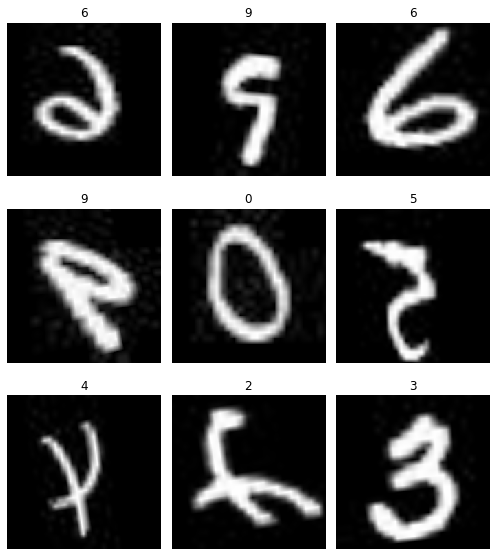

In [53]:
data.show_batch(rows=3, figsize=(7,8))

In [54]:
doc(cnn_learner)

In [55]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /home/jupyter/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [56]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.365368,0.192277,0.064774,01:21
1,0.185183,0.094085,0.030180,01:20
2,0.123305,0.070710,0.023500,01:19
3,0.101355,0.061737,0.019921,01:19


In [57]:
learn.save('stage1')

In [58]:
learn.unfreeze()

In [59]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


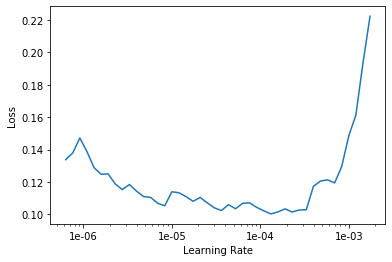

In [60]:
learn.recorder.plot()

In [61]:
learn.fit_one_cycle(4, max_lr=slice(1e-5,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.076748,0.036646,0.011332,01:37
1,0.058805,0.036770,0.012645,01:37
2,0.033980,0.023492,0.007754,01:37
3,0.027933,0.020772,0.007396,01:37


In [62]:
learn.save('stage-2-unfreeze-99')

In [93]:
#Prediction
test_csv_path = 'data/test.csv'
test_df=pd.read_csv(test_csv_path)
test_img_pixels=test_df.values
test_img_pixels
test_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
def create_test_image():
    test_img_folder='data/test/'
    for i in range(0,len(test_img_pixels)):
        img = test_img_pixels[i][:]
        img=img.reshape(28,28)
        img = np.stack((img,)*3,axis = -1)
        img = np.uint8(img)
        new_img = Image.fromarray(img)
        new_img.save(test_img_folder+str(i)+".jpg",'JPEG')
        

In [66]:
create_test_image()

In [109]:
def getImage(image_name):
    img = open_image('data/test/'+image_name)
    #show_image(img)
    return img

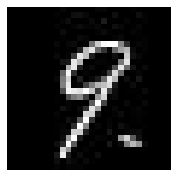

In [88]:
getImage("2.jpg")

In [89]:
learn=learn.load('stage-2-unfreeze-99')

In [117]:
def getPrediction(index):
    img=getImage(str(index)+".jpg")
    pred_class,_,_ = learn.predict(img)
    labelId=int(str(pred_class).replace("Category ",""))
    return labelId

In [122]:
f = open("data/submission.csv", "a")
f.write("ImageId,LabelId")
f.close()
with open("data/submission.csv", "a") as f:
    writer=csv.writer(f,delimiter=',')
    for i in range(0,len(test_img_pixels)):
        labelId=getPrediction(i)
        writer.writerow([i,labelId])
        break;
f.close()
    

In [101]:
predict_df.head()

,ImageId,LabelId,1,2,3,4,5,6,7,8,...,14154,14155,14156,14157,14158,14159,14160,14161,14162,14163


9

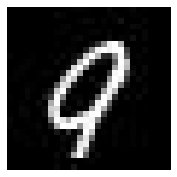

In [107]:
pred_class,_,_ = learn.predict(getImage("14157.jpg"))
int(str(pred_class).replace("Category ",""))